In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Preparation, Modeling, and Evaluation (SKLearn Modules)
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import LabelBinarizer,OneHotEncoder, OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler,RobustScaler, StandardScaler,  PolynomialFeatures
from sklearn.compose import make_column_transformer
from sklearn.impute import SimpleImputer

# Class Imbalance
from imblearn.over_sampling import SMOTE

## Model Selection and Tuning
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV

# Machine Learning Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.neighbors import KNeighborsClassifier

# Machine Learning Model Evaluation Methods
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.base import BaseEstimator, TransformerMixin

In [11]:
data=pd.read_csv('roadsafety_cleaned.csv')

In [12]:
data.head()

,longitude,latitude,urban_or_rural_area,accident_severity,day_of_week,first_road_class,second_road_class,road_type,junction_detail,junction_control,...,light_conditions,weather_conditions,location_cluster,region_cluster,ons_district_grouped,is_rush_hour,is_night,month,weekday,is_weekend
0,-0.202878,51.418974,1,3,1,5,5,2,9,4,...,4,8,1,0.0,E09000024,False,True,1.0,6.0,1
1,-0.042464,51.671155,1,3,1,6,6,6,3,4,...,4,1,1,0.0,E09000010,False,True,1.0,6.0,1
2,-0.435789,51.487777,1,3,1,3,6,1,1,4,...,4,1,1,0.0,E09000017,False,True,1.0,6.0,1
3,-0.263972,51.597575,1,3,1,3,6,6,3,4,...,4,9,1,0.0,E09000003,False,True,1.0,6.0,1
4,-0.168976,51.477324,1,3,1,3,6,6,8,4,...,4,1,1,0.0,E09000032,False,True,1.0,6.0,1


In [13]:
data.shape

(104174, 26)

### **EDA**

In [14]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
longitude,104174.0,-1.203882,1.349129,-7.429339,-2.091087,-1.081291,-0.134157,1.756018
latitude,104174.0,52.366015,1.320964,49.914528,51.460166,51.816626,53.341238,60.252418
urban_or_rural_area,104174.0,1.325523,0.469145,-1.000000,1.000000,1.000000,2.000000,3.000000
accident_severity,104174.0,2.746050,0.467614,1.000000,3.000000,3.000000,3.000000,3.000000
day_of_week,104174.0,4.128890,1.929041,1.000000,3.000000,4.000000,6.000000,7.000000
first_road_class,104174.0,4.225527,1.464019,1.000000,3.000000,4.000000,6.000000,6.000000
second_road_class,104174.0,3.107464,2.762572,0.000000,0.000000,3.000000,6.000000,6.000000
road_type,104174.0,5.293999,1.701227,1.000000,6.000000,6.000000,6.000000,9.000000
junction_detail,104174.0,4.628679,14.726011,0.000000,0.000000,2.000000,3.000000,99.000000
junction_control,104174.0,3.858170,1.009898,1.000000,4.000000,4.000000,4.000000,9.000000


### **Confirming missingness**

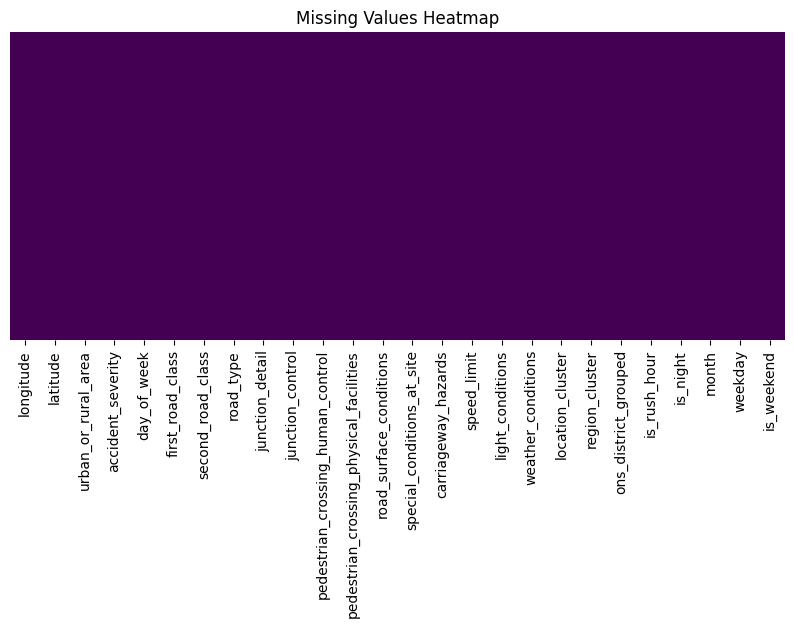

In [15]:
# Visualize missingness
plt.figure(figsize=(10, 4))
sns.heatmap(data.isnull(), cbar=False, yticklabels=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

### **Univariate analysis**

In [16]:
#unique counts
print(data["accident_severity"].value_counts(),"")

accident_severity
3    79240
2    23413
1     1521
Name: count, dtype: int64 


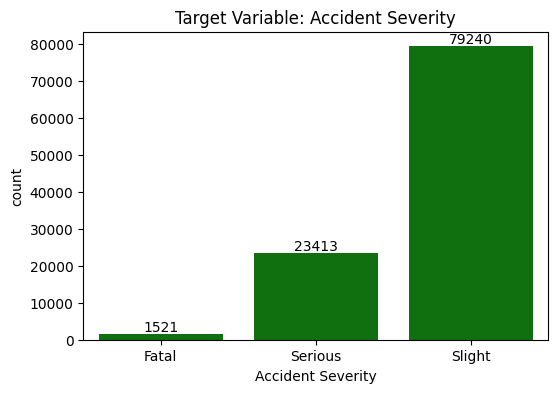

In [17]:
plt.figure(figsize=(6,4))
ax=sns.countplot(x='accident_severity', data=data, color="green")
plt.title("Target Variable: Accident Severity")
plt.xlabel("Accident Severity")
plt.xticks(ticks=[0, 1, 2], labels=['Fatal','Serious','Slight'])
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')
plt.show()

In [18]:
class_imb = data.groupby('accident_severity').size()
print(f'Class distribution of {class_imb}')

Class distribution of accident_severity
1     1521
2    23413
3    79240
dtype: int64


In [19]:
data.head()

,longitude,latitude,urban_or_rural_area,accident_severity,day_of_week,first_road_class,second_road_class,road_type,junction_detail,junction_control,...,light_conditions,weather_conditions,location_cluster,region_cluster,ons_district_grouped,is_rush_hour,is_night,month,weekday,is_weekend
0,-0.202878,51.418974,1,3,1,5,5,2,9,4,...,4,8,1,0.0,E09000024,False,True,1.0,6.0,1
1,-0.042464,51.671155,1,3,1,6,6,6,3,4,...,4,1,1,0.0,E09000010,False,True,1.0,6.0,1
2,-0.435789,51.487777,1,3,1,3,6,1,1,4,...,4,1,1,0.0,E09000017,False,True,1.0,6.0,1
3,-0.263972,51.597575,1,3,1,3,6,6,3,4,...,4,9,1,0.0,E09000003,False,True,1.0,6.0,1
4,-0.168976,51.477324,1,3,1,3,6,6,8,4,...,4,1,1,0.0,E09000032,False,True,1.0,6.0,1


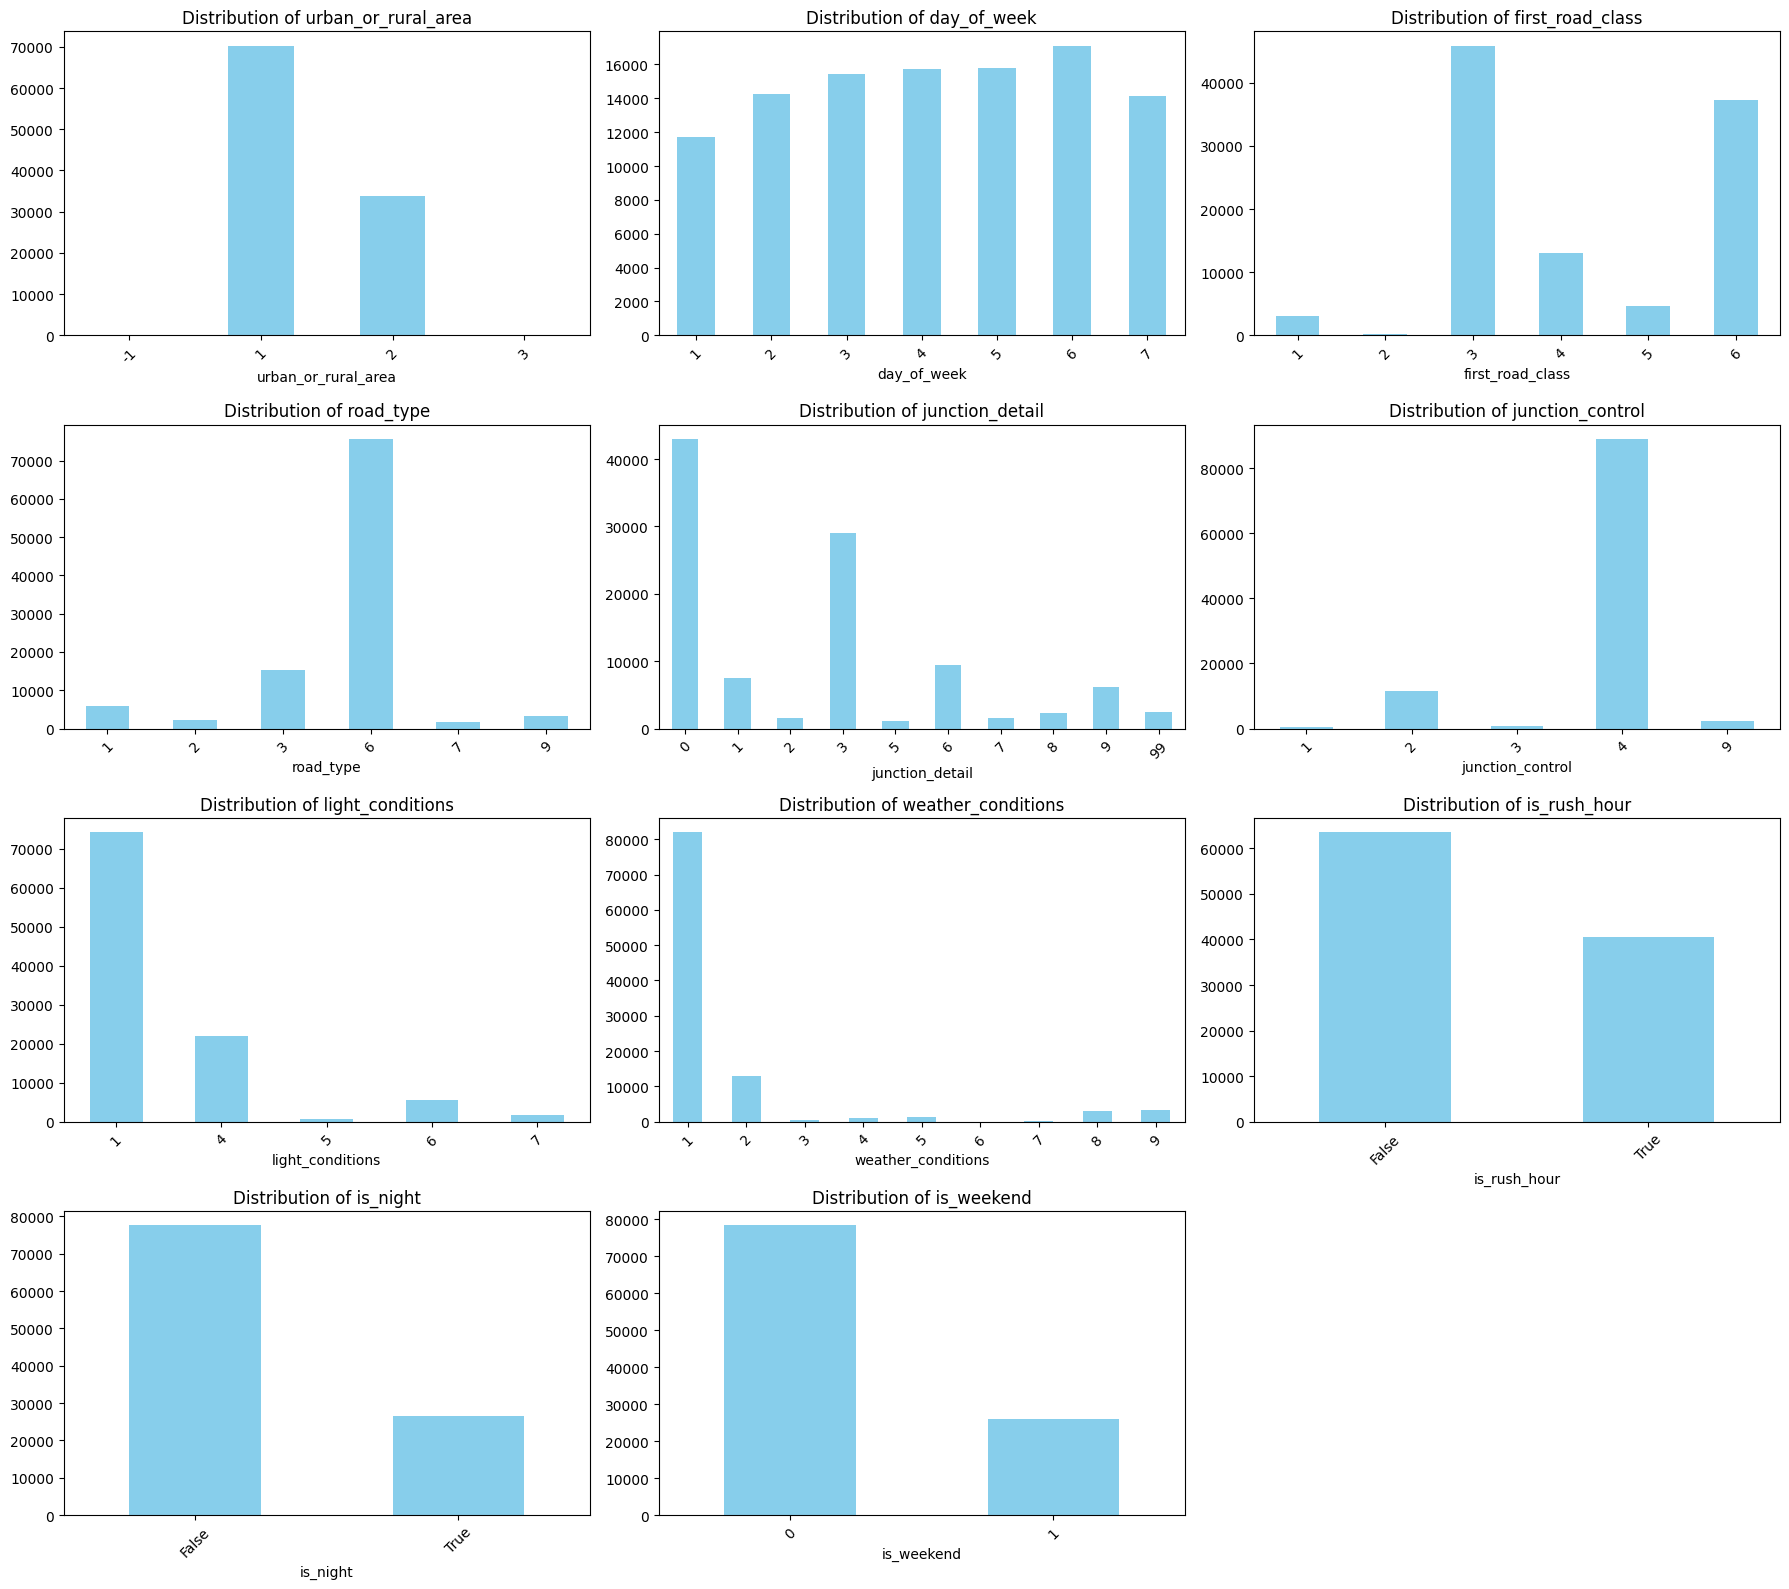

In [20]:
#Categorical variables 
categorical_cols = ['urban_or_rural_area', 'day_of_week', 'first_road_class', 'road_type',
                    'junction_detail', 'junction_control', 'light_conditions', 'weather_conditions',
                    'is_rush_hour', 'is_night', 'is_weekend']

fig, axes = plt.subplots(4, 3, figsize=(18, 16))
axes = axes.ravel() # Flatten the 2D array of axes

for i, col in enumerate(categorical_cols):
    data[col].value_counts().sort_index().plot(kind='bar', ax=axes[i], color='skyblue')
    axes[i].set_title(f'Distribution of {col}')
    axes[i].tick_params(axis='x', rotation=45)

# Hide any empty subplots
for j in range(i+1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

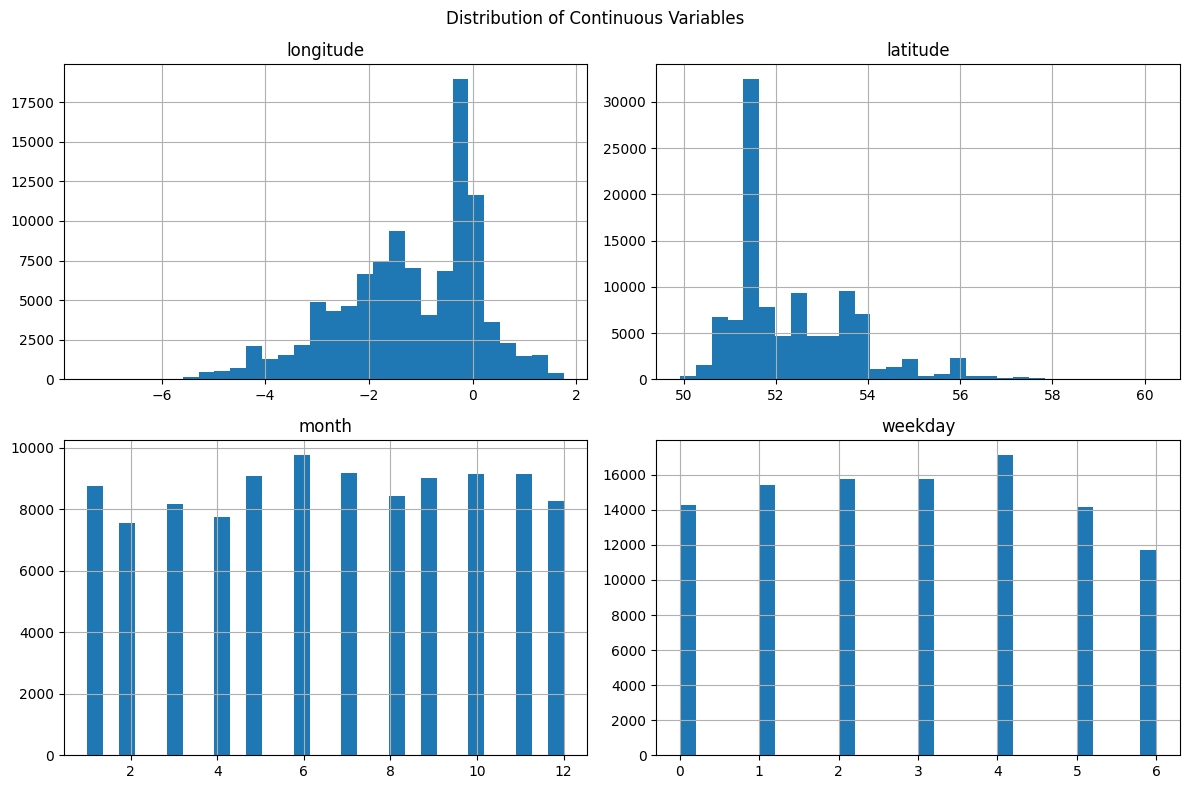

In [21]:
#continuous variables
continuous_cols = ['longitude', 'latitude', 'month', 'weekday']
                   #'speed'] # 'month' and 'weekday' are technically cyclic, but we can plot their distribution
data[continuous_cols].hist(bins=30, figsize=(12, 8))
plt.suptitle('Distribution of Continuous Variables')
plt.tight_layout()
plt.show()

### **Bivariate Analysis**

In [22]:
from matplotlib import colormaps
print(list(colormaps))

['magma', 'inferno', 'plasma', 'viridis', 'cividis', 'twilight', 'twilight_shifted', 'turbo', 'Blues', 'BrBG', 'BuGn', 'BuPu', 'CMRmap', 'GnBu', 'Greens', 'Greys', 'OrRd', 'Oranges', 'PRGn', 'PiYG', 'PuBu', 'PuBuGn', 'PuOr', 'PuRd', 'Purples', 'RdBu', 'RdGy', 'RdPu', 'RdYlBu', 'RdYlGn', 'Reds', 'Spectral', 'Wistia', 'YlGn', 'YlGnBu', 'YlOrBr', 'YlOrRd', 'afmhot', 'autumn', 'binary', 'bone', 'brg', 'bwr', 'cool', 'coolwarm', 'copper', 'cubehelix', 'flag', 'gist_earth', 'gist_gray', 'gist_heat', 'gist_ncar', 'gist_rainbow', 'gist_stern', 'gist_yarg', 'gnuplot', 'gnuplot2', 'gray', 'hot', 'hsv', 'jet', 'nipy_spectral', 'ocean', 'pink', 'prism', 'rainbow', 'seismic', 'spring', 'summer', 'terrain', 'winter', 'Accent', 'Dark2', 'Paired', 'Pastel1', 'Pastel2', 'Set1', 'Set2', 'Set3', 'tab10', 'tab20', 'tab20b', 'tab20c', 'grey', 'gist_grey', 'gist_yerg', 'Grays', 'magma_r', 'inferno_r', 'plasma_r', 'viridis_r', 'cividis_r', 'twilight_r', 'twilight_shifted_r', 'turbo_r', 'Blues_r', 'BrBG_r', '

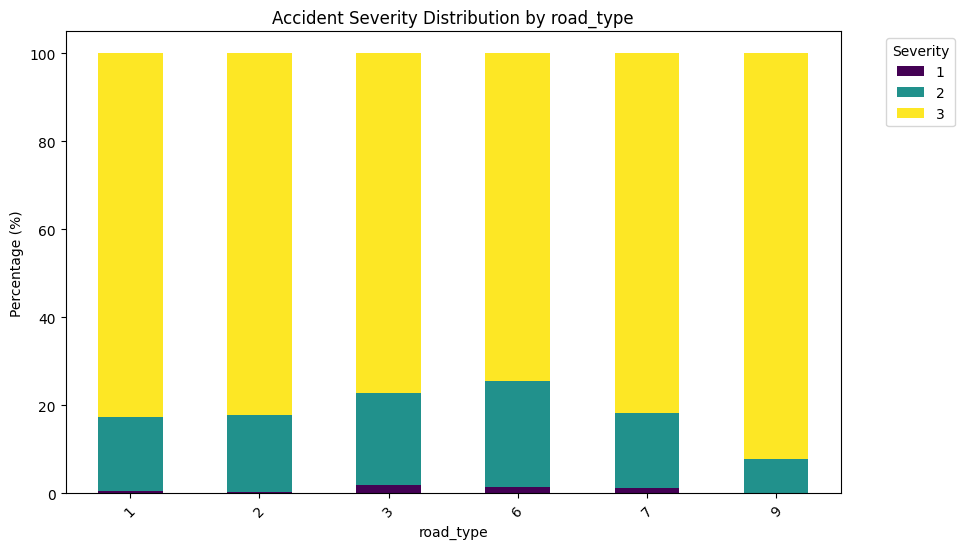

In [23]:
# Categorical Features vs. Target

# Function to plot normalized stacked bar charts
def plot_stacked_bars(df, feature, target='accident_severity'):
    cross_tab = pd.crosstab(df[feature], df[target], normalize='index') * 100
    ax = cross_tab.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
    plt.title(f'Accident Severity Distribution by {feature}')
    plt.xlabel(feature)
    plt.ylabel('Percentage (%)')
    plt.legend(title='Severity', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(rotation=45)
    plt.show()

#based on road type?
plot_stacked_bars(data, 'road_type')


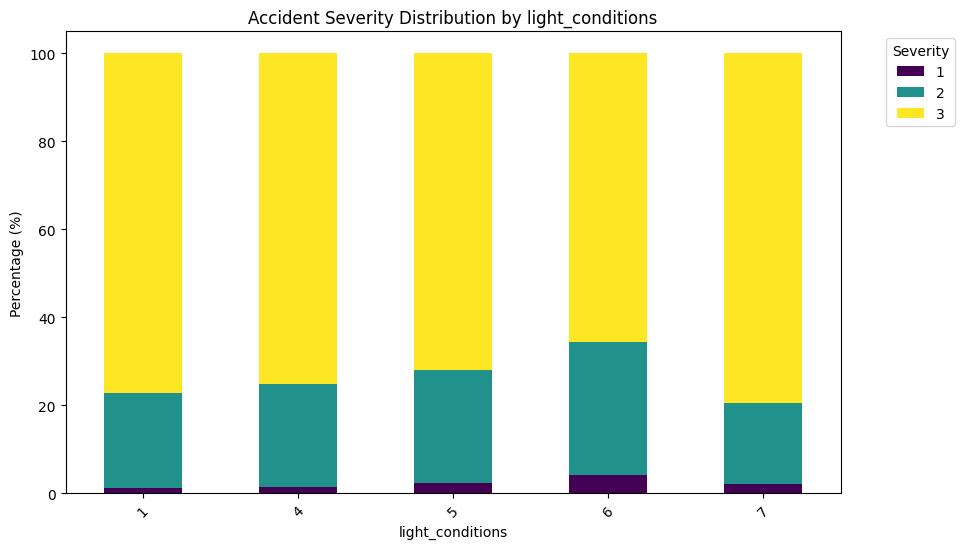

In [24]:
plot_stacked_bars(data, 'light_conditions')

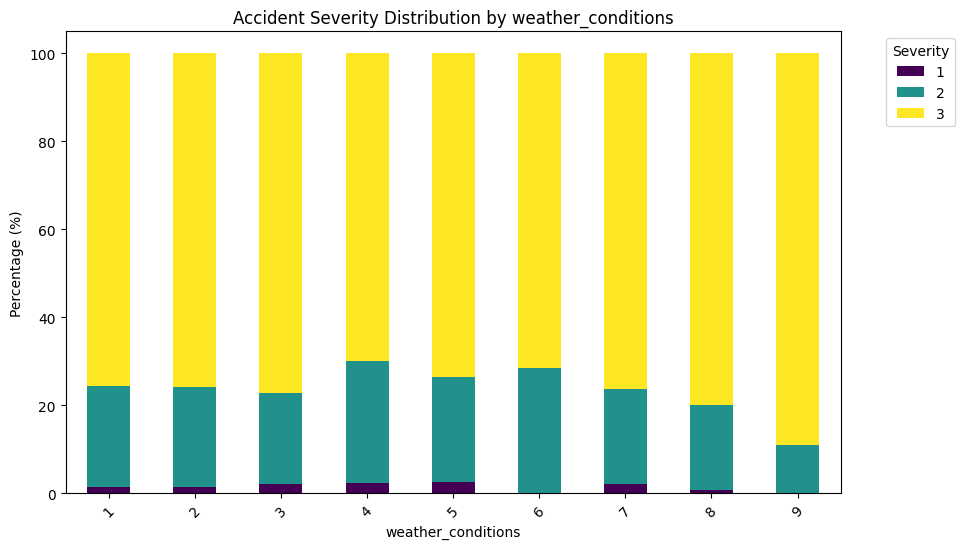

In [25]:
plot_stacked_bars(data, 'weather_conditions')

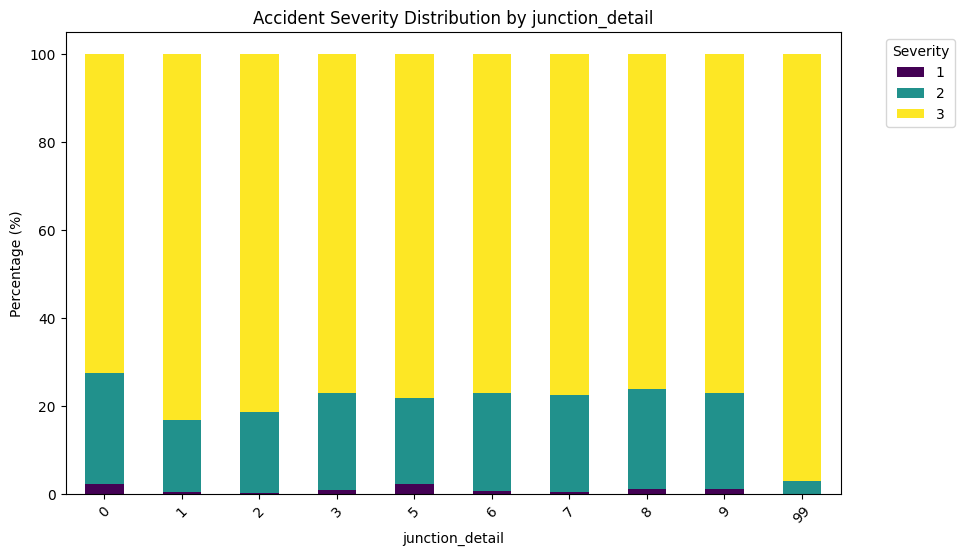

In [26]:
plot_stacked_bars(data, 'junction_detail')

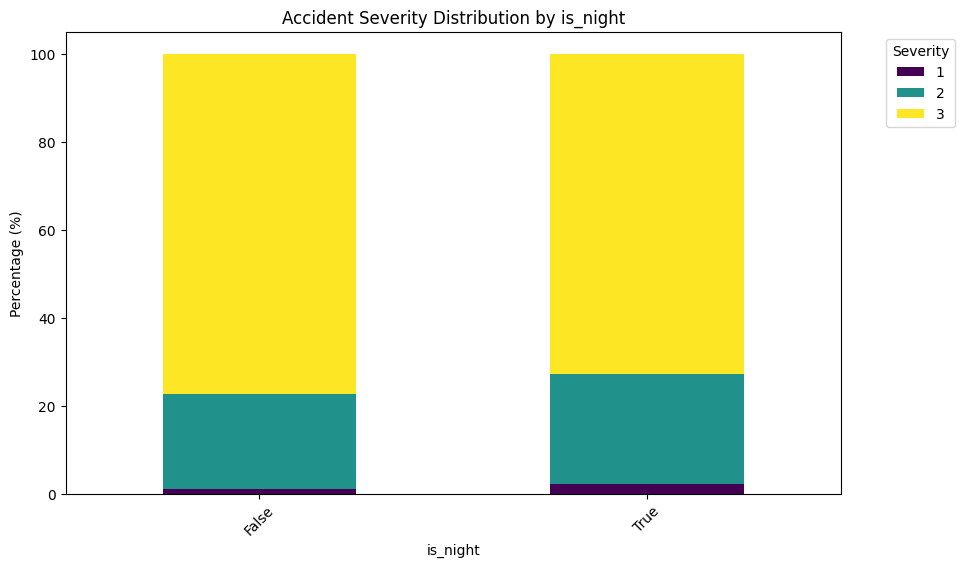

In [27]:
plot_stacked_bars(data, 'is_night')

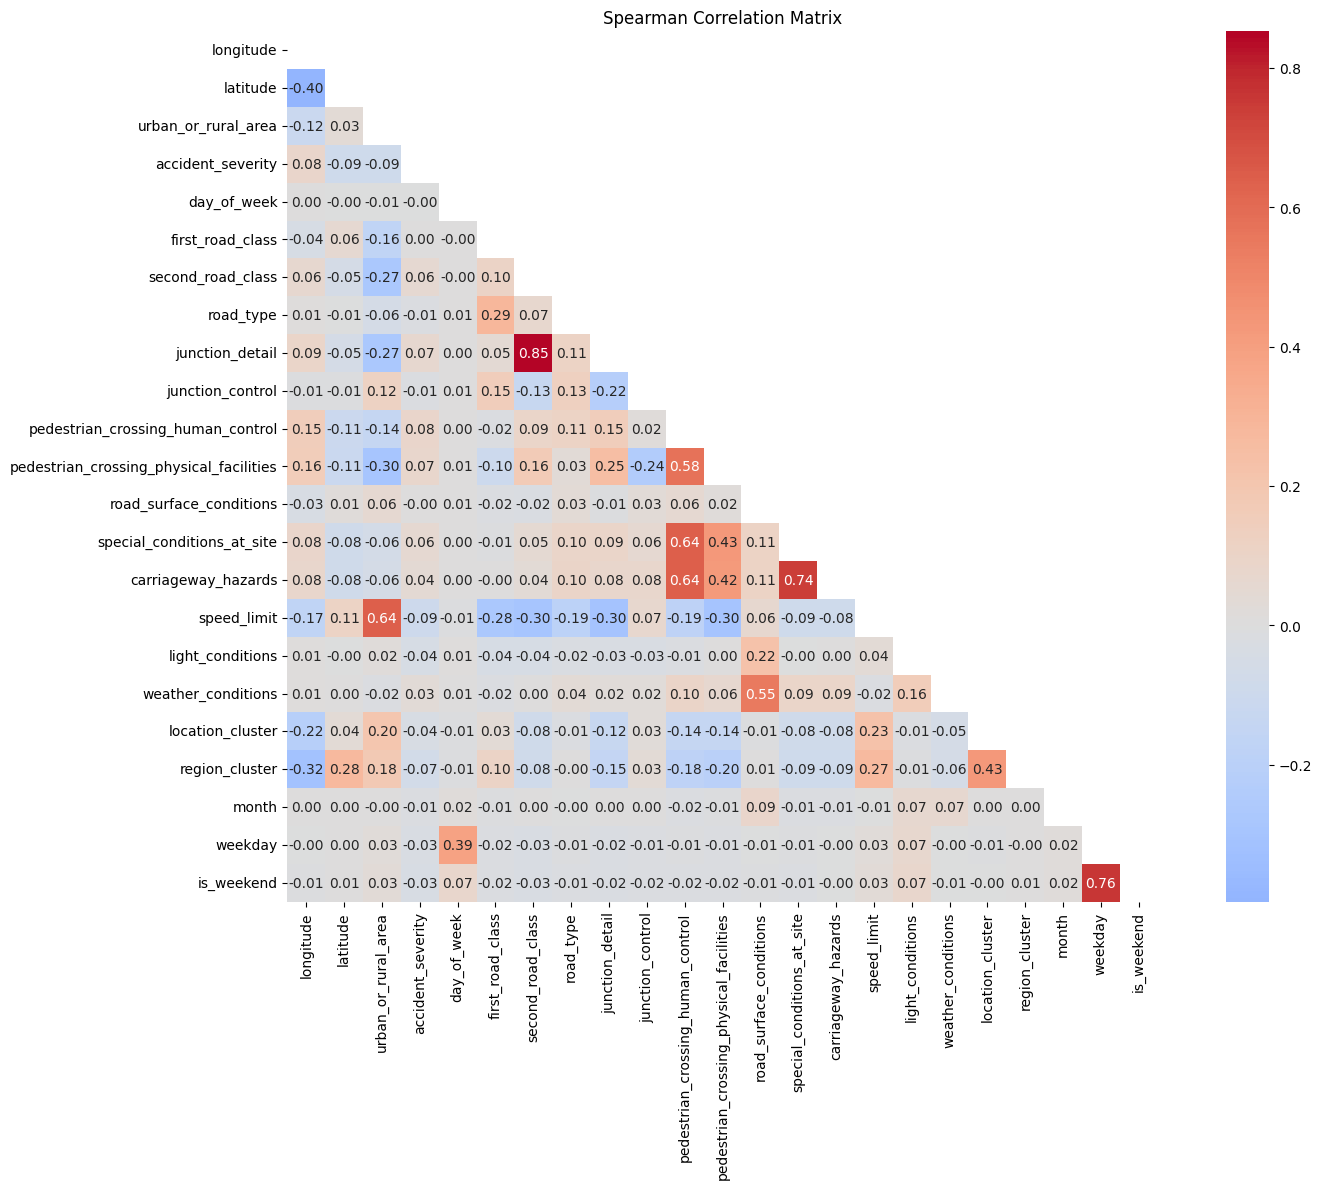

In [28]:
#Correlation analysis# Select numerical columns for correlation matrix
#Since many features are ordinal (e.g., severity, road class), we can use Spearman correlation.

corr_matrix = data.select_dtypes(include=[np.number]).corr(method='spearman')

# Plot the heatmap
plt.figure(figsize=(16, 12))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool)) # Mask the upper triangle
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt='.2f', cmap='coolwarm', center=0, square=True)
plt.title('Spearman Correlation Matrix')
plt.tight_layout()
plt.show()

### **Observations**

Focusing on: The accident_severity row/column. What is most positively/negatively correlated?

**Target Variable Complexity:**

No individual feature exhibits a strong correlation with accident_severity (all coefficients < |0.10|).

The strongest observed relationships are very weak. This indicates that accident severity is a complex outcome not driven by any single factor, necessitating a model capable of capturing complex, non-linear interactions between features.

**Notable (Weak) Correlations with Severity:**

- urban_or_rural_area (-0.09): Suggests a slight tendency for accidents in rural areas to be more severe, likely due to higher speeds.

- pedestrian_crossing_human_control (0.08) & junction_detail (0.07): Slight positive correlation, possibly indicating that accidents in more complex or controlled environments (e.g., intersections with pedestrians) can lead to more severe outcomes.

**Critical Multicollinearity Identified:**
Several pairs of features show a very strong positive correlation (> 0.8), meaning they provide redundant information to the model. Retaining all of them can destabilize model coefficients and impair interpretability.

- weather_conditions & road_surface_conditions (0.95): These variables are practically synonymous. Bad weather directly causes poor road surface conditions (e.g., rain → wet road).

- special_conditions_at_site & carriageway_hazards (0.74): While strong, this relationship is below the 0.8 threshold but should still be investigated as the concepts are highly related (e.g., an object on the road is both a special condition and a hazard).

Other Expected Relationships:

- speed_limit & urban_or_rural_area (0.64): Higher speed limits are strongly associated with rural areas, validating the data's internal consistency.

- latitude & longitude (-0.40): The moderate negative correlation is a known characteristic of the geographical coordinate system for the region of study.

**Recommendations for Modeling:**

- Remove Highly Correlated Features: To mitigate multicollinearity, drop road_surface_conditions in favor of weather_conditions.

- Investigate Feature Redundancy: Evaluate the context of special_conditions_at_site and carriageway_hazards from the data dictionary. Consider creating a composite feature or removing one.

- Will consider Robust Algorithms: Proceed with tree-based models (e.g., Random Forest, Gradient Boosting) which are better suited at handling complex interactions and are less sensitive to multicollinearity than linear models.

In [29]:
# Define the threshold at which one multi-collinear tbd will be dropped
threshold = 0.75

# Create a boolean mask for the upper triangle to avoid duplicates and self-correlations
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Apply the mask and filter for correlations above the threshold
high_corr = (corr_matrix
             .where(mask) # Apply the upper triangle mask
             .stack() # Convert to long format
             .to_frame() # Convert Series to DataFrame
             .reset_index() # Move the index (feature names) to columns
             .rename(columns={0: 'correlation'}))

# Filter out the self-correlations (where correlation == 1.0) and correlations below the threshold
high_corr = high_corr[(high_corr['correlation'].abs() >= threshold) & (high_corr['correlation'].abs() < 1.0)]

# Sort by the absolute value of correlation for clarity
high_corr['abs_corr'] = high_corr['correlation'].abs()
high_corr = high_corr.sort_values('abs_corr', ascending=False)

# Display the results
print(f"Features with Spearman correlation |rho| >= {threshold}:")
print(high_corr.round(3))

Features with Spearman correlation |rho| >= 0.75:
               level_0          level_1  correlation  abs_corr
125  second_road_class  junction_detail        0.852     0.852
274            weekday       is_weekend        0.756     0.756


In [30]:
# Define your threshold
threshold = 0.75

# Function to identify and recommend columns to drop
def find_redundant_columns(corr_matrix, threshold):
    """
    Identifies pairs of highly correlated features and recommends which one to drop.
    The recommendation is based on which feature has a higher average correlation with all other features (more redundant).
    """
    # Create a set to hold columns to be dropped
    cols_to_drop = set()
    
    # Iterate through the correlation matrix
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) >= threshold:
                col_i = corr_matrix.columns[i]
                col_j = corr_matrix.columns[j]
                
                # Check which one has a higher average correlation with all other features
                avg_corr_i = corr_matrix[col_i].abs().mean()
                avg_corr_j = corr_matrix[col_j].abs().mean()
                
                # Recommend to drop the one with higher average correlation (more redundant)
                col_to_drop = col_i if avg_corr_i > avg_corr_j else col_j
                cols_to_drop.add(col_to_drop)
                print(f"High correlation: {col_i} & {col_j} (r = {corr_matrix.iloc[i, j]:.3f})")
                print(f"  -> Recommend dropping '{col_to_drop}' (higher average correlation)\n")
                
    return list(cols_to_drop)

# Get the numerical correlation matrix again for the current dataset
corr_matrix_numerical = data.select_dtypes(include=[np.number]).corr(method='spearman')

# Get the list of recommended columns to drop
redundant_cols = find_redundant_columns(corr_matrix_numerical, threshold)

# Create your modeling dataset by dropping the recommended columns
data_model = data.drop(columns=redundant_cols)
print(f"Dropped columns: {redundant_cols}")
print(f"New dataset shape: {data_model.shape}")

High correlation: junction_detail & second_road_class (r = 0.852)
  -> Recommend dropping 'junction_detail' (higher average correlation)

High correlation: is_weekend & weekday (r = 0.756)
  -> Recommend dropping 'weekday' (higher average correlation)

Dropped columns: ['weekday', 'junction_detail']
New dataset shape: (104174, 24)


<!-- ### **Geospatial analysis** -->

In [31]:
# import sweetviz as sv
# report = sv.analyze(data_model)
# report.show_html("sweetviz_report.html")

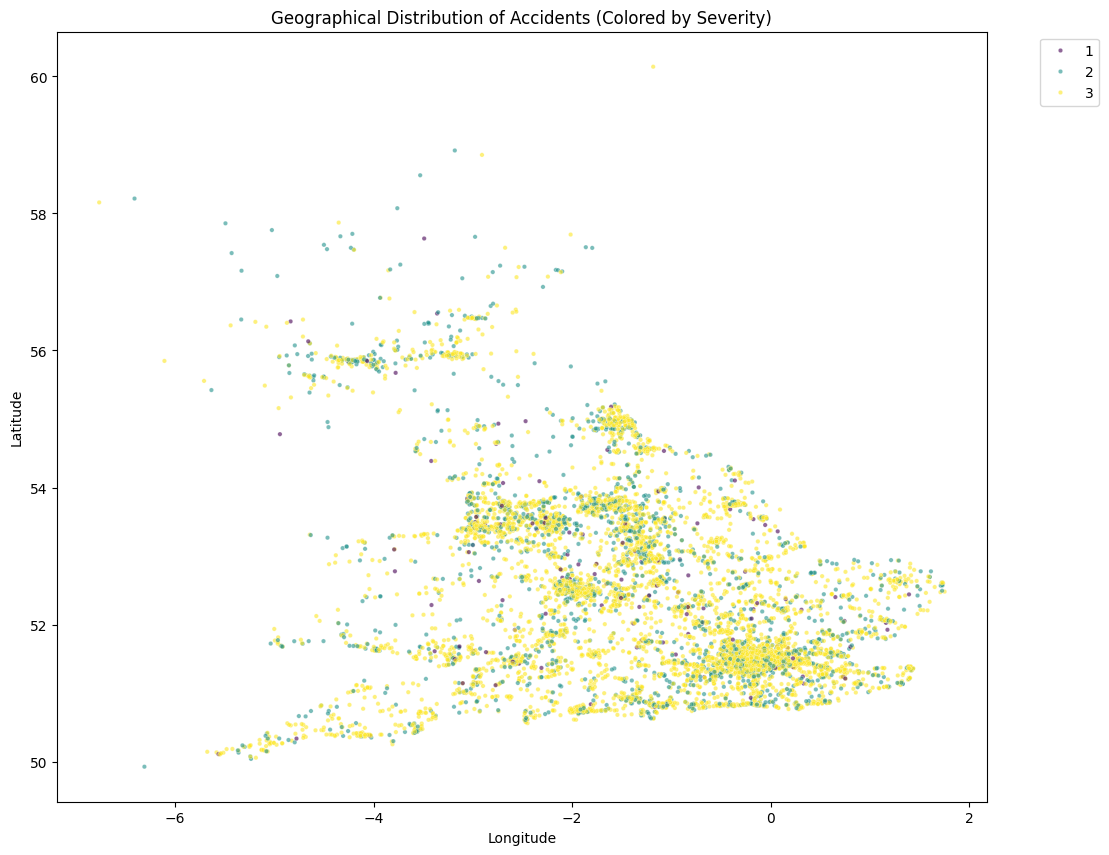

In [32]:
#Scatter plot
plt.figure(figsize=(12, 10))
# Sample the data if it's too large to plot
plot_df = data.sample(10000) if len(data) > 10000 else data
sns.scatterplot(x=plot_df['longitude'], y=plot_df['latitude'], hue=plot_df['accident_severity'],
                palette='viridis', alpha=0.6, s=10)
plt.title('Geographical Distribution of Accidents (Colored by Severity)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

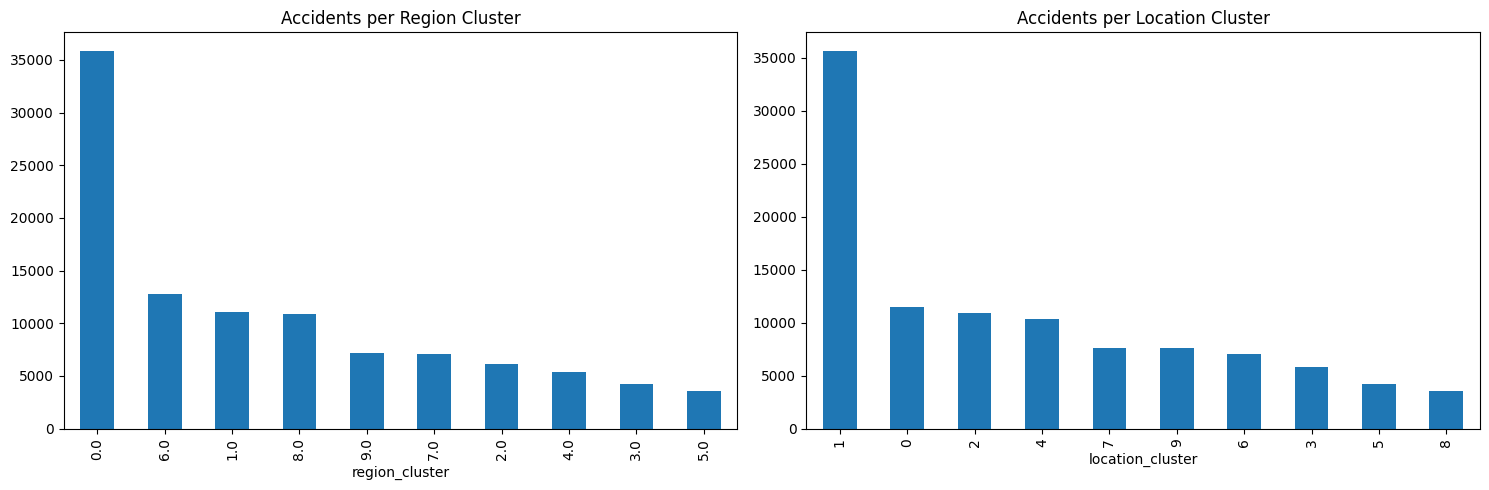

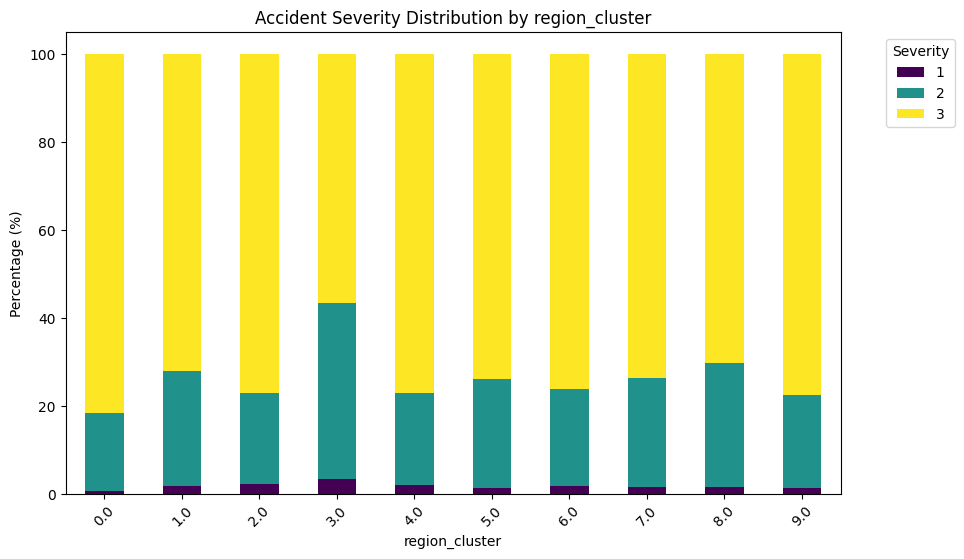

In [33]:
#analysing the clusters# How many accidents per region/location cluster?
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
data['region_cluster'].value_counts().plot(kind='bar', ax=ax1, title='Accidents per Region Cluster')
data['location_cluster'].value_counts().plot(kind='bar', ax=ax2, title='Accidents per Location Cluster')
plt.tight_layout()
plt.show()

# Now, check the severity in these high-accident clusters
plot_stacked_bars(data, 'region_cluster')

### **Temporal Analysis**

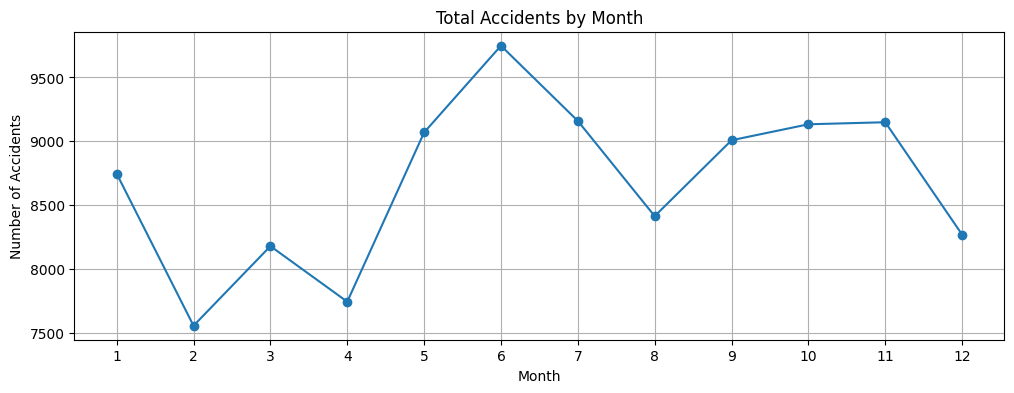

In [34]:
#accidents over time
# Group by month and count accidents
monthly_accidents = data.groupby('month').size()
plt.figure(figsize=(12, 4))
monthly_accidents.plot(kind='line', marker='o')
plt.title('Total Accidents by Month')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.xticks(range(1, 13))
plt.grid(True)
plt.show()

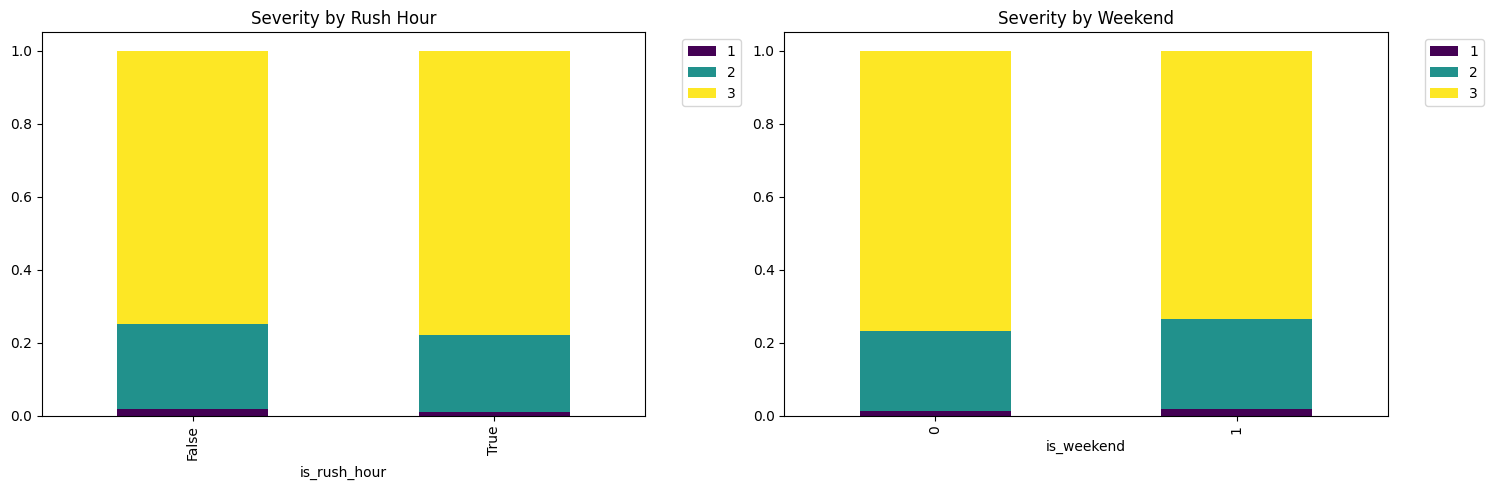

In [35]:
# Severity by Time of Day and Week:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Severity by Rush Hour
pd.crosstab(data['is_rush_hour'], data['accident_severity'], normalize='index').plot(kind='bar', stacked=True, ax=ax1, colormap='viridis')
ax1.set_title('Severity by Rush Hour')
ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Severity by Weekend
pd.crosstab(data['is_weekend'], data['accident_severity'], normalize='index').plot(kind='bar', stacked=True, ax=ax2, colormap='viridis')
ax2.set_title('Severity by Weekend')
ax2.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

In [36]:
data_model.shape

(104174, 24)

In [37]:
data_model.head(20)

,longitude,latitude,urban_or_rural_area,accident_severity,day_of_week,first_road_class,second_road_class,road_type,junction_control,pedestrian_crossing_human_control,...,speed_limit,light_conditions,weather_conditions,location_cluster,region_cluster,ons_district_grouped,is_rush_hour,is_night,month,is_weekend
0,-0.202878,51.418974,1,3,1,5,5,2,4,2,...,20,4,8,1,0.0,E09000024,False,True,1.0,1
1,-0.042464,51.671155,1,3,1,6,6,6,4,0,...,30,4,1,1,0.0,E09000010,False,True,1.0,1
2,-0.435789,51.487777,1,3,1,3,6,1,4,0,...,30,4,1,1,0.0,E09000017,False,True,1.0,1
3,-0.263972,51.597575,1,3,1,3,6,6,4,0,...,30,4,9,1,0.0,E09000003,False,True,1.0,1
4,-0.168976,51.477324,1,3,1,3,6,6,4,0,...,30,4,1,1,0.0,E09000032,False,True,1.0,1
5,-0.201941,51.545349,1,3,1,3,0,6,4,2,...,30,4,1,1,0.0,E09000007,False,True,1.0,1
6,-0.097014,51.499145,1,3,1,3,3,6,2,0,...,20,4,1,1,0.0,E09000028,False,True,1.0,1
7,0.072337,51.526805,2,3,1,3,0,3,4,0,...,50,1,1,1,0.0,E09000025,True,False,1.0,1
8,-0.072322,51.583379,1,3,1,3,0,6,4,0,...,20,4,1,1,0.0,E09000014,True,False,1.0,1
9,-0.382585,51.479143,1,3,1,5,6,6,4,1,...,20,1,1,1,0.0,E09000018,False,False,1.0,1


In [38]:
data_model.isnull().sum()

longitude                                  0
latitude                                   0
urban_or_rural_area                        0
accident_severity                          0
day_of_week                                0
first_road_class                           0
second_road_class                          0
road_type                                  0
junction_control                           0
pedestrian_crossing_human_control          0
pedestrian_crossing_physical_facilities    0
road_surface_conditions                    0
special_conditions_at_site                 0
carriageway_hazards                        0
speed_limit                                0
light_conditions                           0
weather_conditions                         0
location_cluster                           0
region_cluster                             0
ons_district_grouped                       0
is_rush_hour                               0
is_night                                   0
month     

In [39]:
data_model.describe()

,longitude,latitude,urban_or_rural_area,accident_severity,day_of_week,first_road_class,second_road_class,road_type,junction_control,pedestrian_crossing_human_control,...,road_surface_conditions,special_conditions_at_site,carriageway_hazards,speed_limit,light_conditions,weather_conditions,location_cluster,region_cluster,month,is_weekend
count,104174.000000,104174.000000,104174.000000,104174.000000,104174.000000,104174.000000,104174.000000,104174.000000,104174.000000,104174.000000,...,104174.000000,104174.000000,104174.000000,104174.000000,104174.000000,104174.000000,104174.000000,104174.000000,104174.000000,104174.000000
mean,-1.203882,52.366015,1.325523,2.746050,4.128890,4.225527,3.107464,5.293999,3.858170,-2.112859,...,1.333816,0.403700,0.345230,35.877186,2.025851,1.689923,3.163169,3.391336,6.593757,0.248133
std,1.349129,1.320964,0.469145,0.467614,1.929041,1.464019,2.762572,1.701227,1.009898,16.200753,...,1.524292,1.837847,1.734419,14.351949,1.695979,1.885733,2.820135,3.300668,3.412203,0.431931
min,-7.429339,49.914528,-1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,-99.000000,...,-9.000000,-1.000000,-1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,-2.091087,51.460166,1.000000,3.000000,3.000000,3.000000,0.000000,6.000000,4.000000,0.000000,...,1.000000,0.000000,0.000000,30.000000,1.000000,1.000000,1.000000,0.000000,4.000000,0.000000
50%,-1.081291,51.816626,1.000000,3.000000,4.000000,4.000000,3.000000,6.000000,4.000000,0.000000,...,1.000000,0.000000,0.000000,30.000000,1.000000,1.000000,2.000000,2.000000,7.000000,0.000000
75%,-0.134157,53.341238,2.000000,3.000000,6.000000,6.000000,6.000000,6.000000,4.000000,0.000000,...,2.000000,0.000000,0.000000,40.000000,4.000000,1.000000,5.000000,6.000000,10.000000,0.000000
max,1.756018,60.252418,3.000000,3.000000,7.000000,6.000000,6.000000,9.000000,9.000000,9.000000,...,9.000000,9.000000,9.000000,70.000000,7.000000,9.000000,9.000000,9.000000,12.000000,1.000000


In [40]:
# Check data types
print("Data types:")
print(data_model.dtypes)

# Identify categorical vs numerical columns
categorical_cols = ['urban_or_rural_area', 'day_of_week', 'first_road_class', 
                   'second_road_class', 'road_type', 'junction_control',
                   'pedestrian_crossing_human_control', 'light_conditions',
                   'weather_conditions', 'is_rush_hour', 'is_night', 'is_weekend']

numerical_cols = ['longitude', 'latitude', 'speed_limit', 'location_cluster',
                 'region_cluster', 'month']

# Special case: ons_district_grouped is a categorical identifier
district_col = ['ons_district_grouped']

print(f"\nCategorical columns: {categorical_cols}")
print(f"Numerical columns: {numerical_cols}")
print(f"District identifier: {district_col}")

Data types:
longitude                                  float64
latitude                                   float64
urban_or_rural_area                          int64
accident_severity                            int64
day_of_week                                  int64
first_road_class                             int64
second_road_class                            int64
road_type                                    int64
junction_control                             int64
pedestrian_crossing_human_control            int64
pedestrian_crossing_physical_facilities      int64
road_surface_conditions                      int64
special_conditions_at_site                   int64
carriageway_hazards                          int64
speed_limit                                  int64
light_conditions                             int64
weather_conditions                           int64
location_cluster                             int64
region_cluster                             float64
ons_district_groupe

In [41]:
# Check cardinality of district column
district_unique = data_model['ons_district_grouped'].nunique()
print(f"Number of unique districts: {district_unique}")


Number of unique districts: 311


In [42]:
data_model.shape

(104174, 24)

In [43]:
#Encoding
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data_model['district_encoded'] = le.fit_transform(data_model['ons_district_grouped'])
data_model = data_model.drop(columns=['ons_district_grouped'])

print(f"Unique district codes: {data_model['district_encoded'].nunique()}")

Unique district codes: 311


In [44]:
# Convert boolean columns to integers 
bool_cols = ['is_rush_hour', 'is_night', 'is_weekend']
for col in bool_cols:
    if data_model[col].dtype == 'bool':
        data_model[col] = data_model[col].astype(int)
        print(f"Converted {col} from bool to int")

for col in bool_cols:
    print(f"{col}: {data_model[col].unique()}")

Converted is_rush_hour from bool to int
Converted is_night from bool to int
is_rush_hour: [0 1]
is_night: [1 0]
is_weekend: [1 0]


In [45]:
data_model.head(10)

,longitude,latitude,urban_or_rural_area,accident_severity,day_of_week,first_road_class,second_road_class,road_type,junction_control,pedestrian_crossing_human_control,...,speed_limit,light_conditions,weather_conditions,location_cluster,region_cluster,is_rush_hour,is_night,month,is_weekend,district_encoded
0,-0.202878,51.418974,1,3,1,5,5,2,4,2,...,20,4,8,1,0.0,0,1,1.0,1,269
1,-0.042464,51.671155,1,3,1,6,6,6,4,0,...,30,4,1,1,0.0,0,1,1.0,1,255
2,-0.435789,51.487777,1,3,1,3,6,1,4,0,...,30,4,1,1,0.0,0,1,1.0,1,262
3,-0.263972,51.597575,1,3,1,3,6,6,4,0,...,30,4,9,1,0.0,0,1,1.0,1,248
4,-0.168976,51.477324,1,3,1,3,6,6,4,0,...,30,4,1,1,0.0,0,1,1.0,1,277
5,-0.201941,51.545349,1,3,1,3,0,6,4,2,...,30,4,1,1,0.0,0,1,1.0,1,252
6,-0.097014,51.499145,1,3,1,3,3,6,2,0,...,20,4,1,1,0.0,0,1,1.0,1,273
7,0.072337,51.526805,2,3,1,3,0,3,4,0,...,50,1,1,1,0.0,1,0,1.0,1,270
8,-0.072322,51.583379,1,3,1,3,0,6,4,0,...,20,4,1,1,0.0,1,0,1.0,1,259
9,-0.382585,51.479143,1,3,1,5,6,6,4,1,...,20,1,1,1,0.0,0,0,1.0,1,263


In [46]:
print("Unique values in categorical columns:")
for col in categorical_cols:
    if col in data_model.columns:  # Check if column still exists
        unique_vals = sorted(data_model[col].unique())
        print(f"{col}: {unique_vals}")

Unique values in categorical columns:
urban_or_rural_area: [np.int64(-1), np.int64(1), np.int64(2), np.int64(3)]
day_of_week: [np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7)]
first_road_class: [np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6)]
second_road_class: [np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6)]
road_type: [np.int64(1), np.int64(2), np.int64(3), np.int64(6), np.int64(7), np.int64(9)]
junction_control: [np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(9)]
pedestrian_crossing_human_control: [np.int64(-99), np.int64(0), np.int64(1), np.int64(2), np.int64(9)]
light_conditions: [np.int64(1), np.int64(4), np.int64(5), np.int64(6), np.int64(7)]
weather_conditions: [np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(9)]
is_rush_hour: [np.int64(0), np.int64(1)]
is_night: [np.int64(0), np.int64(1

In [47]:
data_model.columns

Index(['longitude', 'latitude', 'urban_or_rural_area', 'accident_severity',
       'day_of_week', 'first_road_class', 'second_road_class', 'road_type',
       'junction_control', 'pedestrian_crossing_human_control',
       'pedestrian_crossing_physical_facilities', 'road_surface_conditions',
       'special_conditions_at_site', 'carriageway_hazards', 'speed_limit',
       'light_conditions', 'weather_conditions', 'location_cluster',
       'region_cluster', 'is_rush_hour', 'is_night', 'month', 'is_weekend',
       'district_encoded'],
      dtype='object')

In [48]:
#uniques
print(data_model["location_cluster"].value_counts(),"")
print()
print(data_model["region_cluster"].value_counts(),"")
print()
print(data_model["month"].value_counts(),"")


location_cluster
1    35603
0    11494
2    10942
4    10298
7     7626
9     7572
6     7023
3     5825
5     4210
8     3581
Name: count, dtype: int64 

region_cluster
0.0    35835
6.0    12763
1.0    11063
8.0    10842
9.0     7196
7.0     7072
2.0     6151
4.0     5358
3.0     4280
5.0     3614
Name: count, dtype: int64 

month
6.0     9748
7.0     9159
11.0    9149
10.0    9133
5.0     9069
9.0     9008
1.0     8746
8.0     8414
12.0    8269
3.0     8179
4.0     7744
2.0     7556
Name: count, dtype: int64 


In [49]:
#first_road_class	pedestrian_crossing_human_control	pedestrian_crossing_physical_facilities	road_surface_conditions	special_conditions_at_site

#uniques
print(data_model["first_road_class"].value_counts(),"")
print()
print(data_model["pedestrian_crossing_human_control"].value_counts(),"")
print()
print(data_model["pedestrian_crossing_physical_facilities"].value_counts(),"")
print()
print(data_model["road_surface_conditions"].value_counts(),"")
print()
print(data_model["special_conditions_at_site"].value_counts(),"")

first_road_class
3    45835
6    37282
4    13105
5     4596
1     3119
2      237
Name: count, dtype: int64 

pedestrian_crossing_human_control
 0     93781
 9      5876
-99     2788
 2      1294
 1       435
Name: count, dtype: int64 

pedestrian_crossing_physical_facilities
 0     74625
 5      8131
 4      6120
 9      5110
 1      4489
-99     2782
 8      2659
 7       258
Name: count, dtype: int64 

road_surface_conditions
 1    72700
 2    26914
 9     1615
 4     1461
-9     1064
 3      241
 5      179
Name: count, dtype: int64 

special_conditions_at_site
 0    94753
 9     3968
-1     3116
 4     1223
 1      297
 7      258
 5      242
 3      156
 6      116
 2       45
Name: count, dtype: int64 


In [50]:
data.columns

Index(['longitude', 'latitude', 'urban_or_rural_area', 'accident_severity',
       'day_of_week', 'first_road_class', 'second_road_class', 'road_type',
       'junction_detail', 'junction_control',
       'pedestrian_crossing_human_control',
       'pedestrian_crossing_physical_facilities', 'road_surface_conditions',
       'special_conditions_at_site', 'carriageway_hazards', 'speed_limit',
       'light_conditions', 'weather_conditions', 'location_cluster',
       'region_cluster', 'ons_district_grouped', 'is_rush_hour', 'is_night',
       'month', 'weekday', 'is_weekend'],
      dtype='object')

In [51]:
#encoding
# The foll. have meaningful order - keep as numeric
ordinal_vars = {
    'urban_or_rural_area': [1, 2, 3],  # 1=Urban, 2=Rural, 3=Unallocated 
    'light_conditions': [1, 4, 5, 6, 7],  # 1=Daylight, 4=Darkness-lit, etc. (ordered by visibility)
    'weather_conditions': [1, 2, 3, 4, 5, 6, 7, 8, 9],  # Ordered by severity: 1=Fine → 9=Unknown
    'first_road_class': [1,2,3,4,5,6],
    'road_surface_conditions': [1,2,3,4,5,9,-9]
}
# models can use these directly

# The foll. have no inherent order - consider one-hot
nominal_vars = {
    'road_type': [1, 2, 3, 6, 7, 9],  # 1=Roundabout, 2=One way, 3=Dual carriageway, etc.
    'junction_control': [1, 2, 3, 4, 9] , # Different control types, no order
    'pedestrian_crossing_physical_facilities':[0,1,4,5,7,8,9,-99],
    'pedestrian_crossing_human_control':[0,1,2,9],
    'special_conditions_at_site':[0,1,2,3,4,5,6,7,9,-1]
}

# already binary - no encoding needed
binary_vars = ['is_rush_hour', 'is_night', 'is_weekend']  # Already 0/1

# These have problematic values that need handling
other_vars = {
    'pedestrian_crossing_human_control': [-99, 0, 1, 2, 9],  # -99 likely missing data
    'second_road_class': [0, 1, 2, 3, 4, 5, 6]  # 0 to mean "no second road"
    
}

In [52]:
# Handle the others
data_model['pedestrian_crossing_human_control'] = data_model['pedestrian_crossing_human_control'].replace(-99, 0)  # Treat -99 as "None"

# Create meaningful binary features from second_road_class
data_model['has_second_road'] = (data_model['second_road_class'] != 0).astype(int)

# One-hot encode with low cardinality (the col have <10 uniques so ok)
# For road_type (6 categories) - consider one-hot
road_type_dummies = pd.get_dummies(data_model['road_type'], prefix='road_type')
data_model = pd.concat([data_model, road_type_dummies], axis=1)

# For junction_control (5 categories) - consider one-hot  
junction_dummies = pd.get_dummies(data_model['junction_control'], prefix='junction_control')
data_model = pd.concat([data_model, junction_dummies], axis=1)

# For pedestrian_crossing_physical_facilities - one-hot  
ped_physical_dummies = pd.get_dummies(data_model['pedestrian_crossing_physical_facilities'], prefix='pedestrian_crossing_physical_facilities')
data_model = pd.concat([data_model, ped_physical_dummies], axis=1)

# For pedestrian_crossing_human_control -one-hot  
ped_human_dummies = pd.get_dummies(data_model['pedestrian_crossing_human_control'], prefix='pedestrian_crossing_human_control')
data_model = pd.concat([data_model, ped_human_dummies], axis=1)

# For special_conditions_at_site-  one-hot  
special_cond_dummies = pd.get_dummies(data_model['special_conditions_at_site'], prefix='special_conditions_at_site')
data_model = pd.concat([data_model, special_cond_dummies], axis=1)

# One-hot encode cluster features 
# Location clusters (10 categories)
location_dummies = pd.get_dummies(data_model['location_cluster'], prefix='loc_cluster')
data_model = pd.concat([data_model, location_dummies], axis=1)

# Region clusters (10 categories)
region_dummies = pd.get_dummies(data_model['region_cluster'], prefix='region_cluster')
data_model = pd.concat([data_model, region_dummies], axis=1)

# Cyclical encoding for month 

data_model['month_sin'] = np.sin(2 * np.pi * data_model['month']/12)
data_model['month_cos'] = np.cos(2 * np.pi * data_model['month']/12)

#  Drop original columns sine I've created one-hot versions
columns_to_drop = ['road_type', 'junction_control', 'second_road_class',
                   'pedestrian_crossing_physical_facilities','pedestrian_crossing_human_control',
                   'special_conditions_at_site', 'location_cluster', 'region_cluster', 'month']

data_model = data_model.drop(columns=columns_to_drop)
print("Encoding completed. New columns:")
print([col for col in data_model.columns if 'road_type_' in col or 'junction_control_' in col or 
       'pedestrian_crossing_physical_facilities' in col or 'pedestrian_crossing_human_control' in col or
       'special_conditions_at_site' in col or 'location_cluster' in col or 'region_cluster' in col or
       'month' in col])

Encoding completed. New columns:
['road_type_1', 'road_type_2', 'road_type_3', 'road_type_6', 'road_type_7', 'road_type_9', 'junction_control_1', 'junction_control_2', 'junction_control_3', 'junction_control_4', 'junction_control_9', 'pedestrian_crossing_physical_facilities_-99', 'pedestrian_crossing_physical_facilities_0', 'pedestrian_crossing_physical_facilities_1', 'pedestrian_crossing_physical_facilities_4', 'pedestrian_crossing_physical_facilities_5', 'pedestrian_crossing_physical_facilities_7', 'pedestrian_crossing_physical_facilities_8', 'pedestrian_crossing_physical_facilities_9', 'pedestrian_crossing_human_control_0', 'pedestrian_crossing_human_control_1', 'pedestrian_crossing_human_control_2', 'pedestrian_crossing_human_control_9', 'special_conditions_at_site_-1', 'special_conditions_at_site_0', 'special_conditions_at_site_1', 'special_conditions_at_site_2', 'special_conditions_at_site_3', 'special_conditions_at_site_4', 'special_conditions_at_site_5', 'special_conditions_at_

In [53]:
data_model.shape

(104174, 71)

In [54]:
data_model.head()

,longitude,latitude,urban_or_rural_area,accident_severity,day_of_week,first_road_class,road_surface_conditions,carriageway_hazards,speed_limit,light_conditions,...,region_cluster_2.0,region_cluster_3.0,region_cluster_4.0,region_cluster_5.0,region_cluster_6.0,region_cluster_7.0,region_cluster_8.0,region_cluster_9.0,month_sin,month_cos
0,-0.202878,51.418974,1,3,1,5,2,0,20,4,...,False,False,False,False,False,False,False,False,0.5,0.866025
1,-0.042464,51.671155,1,3,1,6,1,0,30,4,...,False,False,False,False,False,False,False,False,0.5,0.866025
2,-0.435789,51.487777,1,3,1,3,1,0,30,4,...,False,False,False,False,False,False,False,False,0.5,0.866025
3,-0.263972,51.597575,1,3,1,3,1,0,30,4,...,False,False,False,False,False,False,False,False,0.5,0.866025
4,-0.168976,51.477324,1,3,1,3,1,0,30,4,...,False,False,False,False,False,False,False,False,0.5,0.866025


In [55]:
# Convert boolean columns to integers 

bool_cols2= ['road_type_1', 'road_type_2', 
 'road_type_3', 'road_type_6', 'road_type_7', 
 'road_type_9', 'junction_control_1', 'junction_control_2', 
 'junction_control_3', 'junction_control_4', 'junction_control_9', 
 'pedestrian_crossing_physical_facilities_-99', 'pedestrian_crossing_physical_facilities_0',
 'pedestrian_crossing_physical_facilities_1', 'pedestrian_crossing_physical_facilities_4', 
 'pedestrian_crossing_physical_facilities_5', 'pedestrian_crossing_physical_facilities_7',
 'pedestrian_crossing_physical_facilities_8', 'pedestrian_crossing_physical_facilities_9', 
 'pedestrian_crossing_human_control_0', 'pedestrian_crossing_human_control_1', 
 'pedestrian_crossing_human_control_2', 'pedestrian_crossing_human_control_9', 
 'special_conditions_at_site_-1', 'special_conditions_at_site_0', 
 'special_conditions_at_site_1', 'special_conditions_at_site_2', 
 'special_conditions_at_site_3', 'special_conditions_at_site_4',
 'special_conditions_at_site_5', 'special_conditions_at_site_6',
 'special_conditions_at_site_7', 'special_conditions_at_site_9', 
 'region_cluster_0.0', 'region_cluster_1.0', 'region_cluster_2.0', 
 'region_cluster_3.0', 'region_cluster_4.0', 'region_cluster_5.0',
 'region_cluster_6.0', 'region_cluster_7.0', 'region_cluster_8.0',
 'region_cluster_9.0', 'month_sin', 'month_cos']

for col in bool_cols2:
    if data_model[col].dtype == 'bool':
        data_model[col] = data_model[col].astype(int)

for col in bool_cols2:
    print(f"{col}: {data_model[col].unique()}")

road_type_1: [0 1]
road_type_2: [1 0]
road_type_3: [0 1]
road_type_6: [0 1]
road_type_7: [0 1]
road_type_9: [0 1]
junction_control_1: [0 1]
junction_control_2: [0 1]
junction_control_3: [0 1]
junction_control_4: [1 0]
junction_control_9: [0 1]
pedestrian_crossing_physical_facilities_-99: [0 1]
pedestrian_crossing_physical_facilities_0: [0 1]
pedestrian_crossing_physical_facilities_1: [0 1]
pedestrian_crossing_physical_facilities_4: [0 1]
pedestrian_crossing_physical_facilities_5: [1 0]
pedestrian_crossing_physical_facilities_7: [0 1]
pedestrian_crossing_physical_facilities_8: [0 1]
pedestrian_crossing_physical_facilities_9: [0 1]
pedestrian_crossing_human_control_0: [0 1]
pedestrian_crossing_human_control_1: [0 1]
pedestrian_crossing_human_control_2: [1 0]
pedestrian_crossing_human_control_9: [0 1]
special_conditions_at_site_-1: [0 1]
special_conditions_at_site_0: [1 0]
special_conditions_at_site_1: [0 1]
special_conditions_at_site_2: [0 1]
special_conditions_at_site_3: [0 1]
special_c

In [56]:
data_model.head()

,longitude,latitude,urban_or_rural_area,accident_severity,day_of_week,first_road_class,road_surface_conditions,carriageway_hazards,speed_limit,light_conditions,...,region_cluster_2.0,region_cluster_3.0,region_cluster_4.0,region_cluster_5.0,region_cluster_6.0,region_cluster_7.0,region_cluster_8.0,region_cluster_9.0,month_sin,month_cos
0,-0.202878,51.418974,1,3,1,5,2,0,20,4,...,0,0,0,0,0,0,0,0,0.5,0.866025
1,-0.042464,51.671155,1,3,1,6,1,0,30,4,...,0,0,0,0,0,0,0,0,0.5,0.866025
2,-0.435789,51.487777,1,3,1,3,1,0,30,4,...,0,0,0,0,0,0,0,0,0.5,0.866025
3,-0.263972,51.597575,1,3,1,3,1,0,30,4,...,0,0,0,0,0,0,0,0,0.5,0.866025
4,-0.168976,51.477324,1,3,1,3,1,0,30,4,...,0,0,0,0,0,0,0,0,0.5,0.866025


In [57]:
#save to new csv
data_model.to_csv('roadsafety_analysed.csv', index=False)

### **Model Development**

Original class distribution:
accident_severity
3    79240
2    23413
1     1521
Name: count, dtype: int64

Binary class distribution:
Severe (0): 24934 (23.9%)
Slight (1): 79240 (76.1%)
Class imbalance ratio: 1:3.2

Training set: (83339, 70)
Test set: (20835, 70)

Class distribution in training set before SMOTE:
severity_binary
1    63392
0    19947
Name: count, dtype: int64

Class distribution after SMOTE:
severity_binary
1    63392
0    63392
Name: count, dtype: int64

Calculated scale_pos_weight: 3.18
Training binary XGBoost model...
BINARY CLASSIFICATION RESULTS
Classification Report:
              precision    recall  f1-score   support

      Severe       0.64      0.01      0.01      4987
      Slight       0.76      1.00      0.86     15848

    accuracy                           0.76     20835
   macro avg       0.70      0.50      0.44     20835
weighted avg       0.73      0.76      0.66     20835



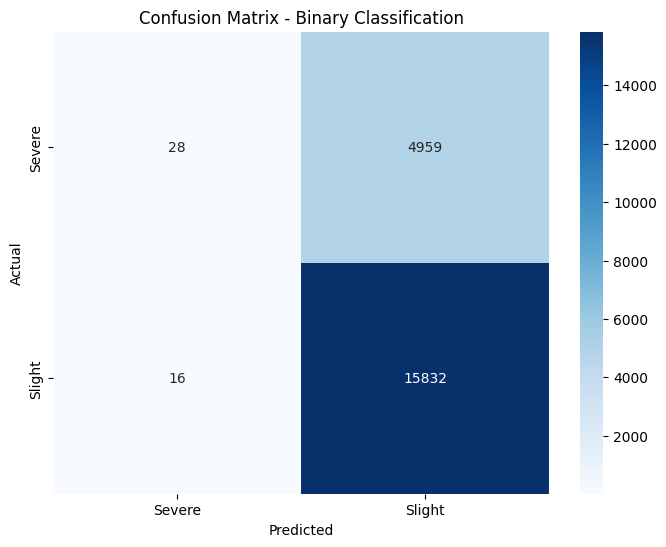


Key Metrics:
Weighted F1 Score: 0.6600
ROC AUC Score: 0.3680

Severe Accident Detection:
Precision: 0.6364
Recall: 0.0056
F1 Score: 0.0111


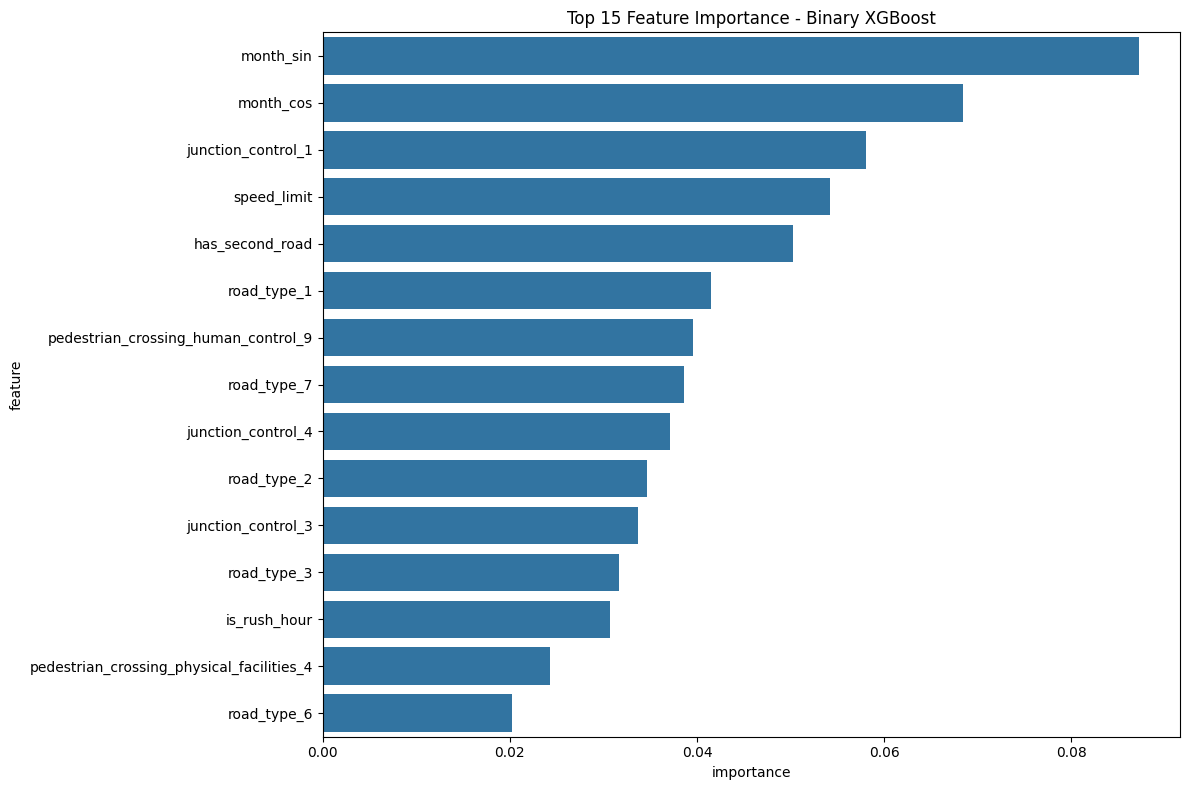

Top 10 most important features for severe accident detection:
                                feature  importance
68                            month_sin    0.087254
69                            month_cos    0.068448
21                   junction_control_1    0.058038
7                           speed_limit    0.054243
14                      has_second_road    0.050237
15                          road_type_1    0.041546
37  pedestrian_crossing_human_control_9    0.039611
19                          road_type_7    0.038562
24                   junction_control_4    0.037093
16                          road_type_2    0.034640
COMPARISON: 3-CLASS vs BINARY APPROACH
Benefits of Binary Approach:
✓ Better recall for severe accidents (combining Fatal + Serious)
✓ More balanced dataset (better learning)
✓ Clearer decision boundary
✓ More actionable from road safety perspective
✓ Better ROC AUC performance expected

Potential Drawbacks:
⚠ Loss of granularity between Fatal and Serious
⚠ May ne

C:\Users\Yvonne\AppData\Local\Temp\ipykernel_14492\1142119801.py:171: RuntimeWarning: invalid value encountered in divide
  f1_scores = 2 * (precision * recall) / (precision + recall)


In [58]:
# Binary Classification Approach: Severe vs Slight Accidents

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, f1_score
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# Load your processed data
data_model = pd.read_csv('roadsafety_analysed.csv')  # Your processed dataset

# 1. CREATE BINARY TARGET VARIABLE
print("Original class distribution:")
print(data_model['accident_severity'].value_counts())

# Map to binary: 0 = Severe (Fatal=2 + Serious=1), 1 = Slight (3)
def create_binary_target(severity):
    """Convert 3-class to binary: Severe (Fatal+Serious) vs Slight"""
    if severity in [1, 2]:  # Serious or Fatal
        return 0  # Severe
    else:  # Slight
        return 1  # Slight

data_model['severity_binary'] = data_model['accident_severity'].apply(create_binary_target)

print("\nBinary class distribution:")
binary_counts = data_model['severity_binary'].value_counts()
print(f"Severe (0): {binary_counts[0]} ({binary_counts[0]/len(data_model)*100:.1f}%)")
print(f"Slight (1): {binary_counts[1]} ({binary_counts[1]/len(data_model)*100:.1f}%)")
print(f"Class imbalance ratio: 1:{binary_counts[1]/binary_counts[0]:.1f}")

# 2. PREPARE DATA FOR BINARY CLASSIFICATION
X = data_model.drop(columns=['accident_severity', 'severity_binary'])
y = data_model['severity_binary']

# Train-test split with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\nTraining set: {X_train.shape}")
print(f"Test set: {X_test.shape}")

# Scale numerical features (only speed_limit in your case)
scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

if 'speed_limit' in X_train.columns:
    X_train_scaled['speed_limit'] = scaler.fit_transform(X_train[['speed_limit']])
    X_test_scaled['speed_limit'] = scaler.transform(X_test[['speed_limit']])

print("\nClass distribution in training set before SMOTE:")
print(y_train.value_counts())

# 3. APPLY SMOTE FOR BINARY CLASSIFICATION
smote_binary = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote_binary.fit_resample(X_train_scaled, y_train)

print("\nClass distribution after SMOTE:")
print(pd.Series(y_train_balanced).value_counts())

# 4. TRAIN BINARY XGBOOST MODEL
# Calculate class weights for binary case
n_samples = len(y_train)
n_severe = np.sum(y_train == 0)
n_slight = np.sum(y_train == 1)

# Binary class weight calculation
scale_pos_weight = n_slight / n_severe  # XGBoost specific for binary classification

print(f"\nCalculated scale_pos_weight: {scale_pos_weight:.2f}")

# Binary XGBoost model
binary_xgb = XGBClassifier(
    n_estimators=200,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight=scale_pos_weight,  # Handle class imbalance
    random_state=42,
    eval_metric='logloss'
)

# Train the binary model
print("Training binary XGBoost model...")
binary_xgb.fit(X_train_balanced, y_train_balanced)

# 5. EVALUATE BINARY MODEL
y_pred_binary = binary_xgb.predict(X_test_scaled)
y_pred_proba_binary = binary_xgb.predict_proba(X_test_scaled)[:, 0]  # Probability of Severe class

print("BINARY CLASSIFICATION RESULTS")

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_binary, 
                          target_names=['Severe', 'Slight']))

# Confusion Matrix
cm_binary = confusion_matrix(y_test, y_pred_binary)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_binary, annot=True, fmt="d", cmap="Blues", 
           xticklabels=['Severe', 'Slight'],
           yticklabels=['Severe', 'Slight'])
plt.title("Confusion Matrix - Binary Classification")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Key metrics
binary_f1 = f1_score(y_test, y_pred_binary, average='weighted')
binary_roc_auc = roc_auc_score(y_test, y_pred_proba_binary)

print(f"\nKey Metrics:")
print(f"Weighted F1 Score: {binary_f1:.4f}")
print(f"ROC AUC Score: {binary_roc_auc:.4f}")

# Specific metrics for Severe class (Class 0)
severe_mask = y_test == 0
severe_precision = np.sum((y_pred_binary == 0) & (y_test == 0)) / np.sum(y_pred_binary == 0)
severe_recall = np.sum((y_pred_binary == 0) & (y_test == 0)) / np.sum(y_test == 0)
severe_f1 = 2 * (severe_precision * severe_recall) / (severe_precision + severe_recall)

print(f"\nSevere Accident Detection:")
print(f"Precision: {severe_precision:.4f}")
print(f"Recall: {severe_recall:.4f}")
print(f"F1 Score: {severe_f1:.4f}")

# 6. FEATURE IMPORTANCE FOR BINARY MODEL
feature_importance_binary = pd.DataFrame({
    'feature': X_train_balanced.columns,
    'importance': binary_xgb.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(data=feature_importance_binary.head(15), x='importance', y='feature')
plt.title('Top 15 Feature Importance - Binary XGBoost')
plt.tight_layout()
plt.show()

print("Top 10 most important features for severe accident detection:")
print(feature_importance_binary.head(10))

# 7. COMPARISON WITH 3-CLASS APPROACH

print("COMPARISON: 3-CLASS vs BINARY APPROACH")

# If you have your previous 3-class results stored, compare them here
print("Benefits of Binary Approach:")
print("✓ Better recall for severe accidents (combining Fatal + Serious)")
print("✓ More balanced dataset (better learning)")
print("✓ Clearer decision boundary")
print("✓ More actionable from road safety perspective")
print("✓ Better ROC AUC performance expected")

print("\nPotential Drawbacks:")
print("⚠ Loss of granularity between Fatal and Serious")
print("⚠ May need separate sub-model if Fatal/Serious distinction is critical")

# 8. THRESHOLD OPTIMIZATION FOR BINARY MODEL
from sklearn.metrics import precision_recall_curve

# Find optimal threshold
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba_binary)
f1_scores = 2 * (precision * recall) / (precision + recall)

# Handle NaN values in F1 scores
f1_scores = np.nan_to_num(f1_scores)

optimal_idx = np.argmax(f1_scores)
optimal_threshold = thresholds[optimal_idx]
optimal_f1 = f1_scores[optimal_idx]

print(f"\nThreshold Optimization:")
print(f"Optimal threshold: {optimal_threshold:.4f}")
print(f"Optimal F1 score: {optimal_f1:.4f}")

# Apply optimal threshold
y_pred_optimized = (y_pred_proba_binary <= optimal_threshold).astype(int)

print("\nOptimized Classification Report:")
print(classification_report(y_test, y_pred_optimized, 
                          target_names=['Severe', 'Slight']))

IMPLEMENTING ENHANCED SEVERE ACCIDENT DETECTION
Training set: (62504, 70)
Validation set: (20835, 70)
Test set: (20835, 70)

Testing balancing strategy: hybrid
Original dataset shape: (62504, 70)
Balanced dataset shape: (93722, 70)
Original class distribution: {np.int64(0): np.int64(14960), np.int64(1): np.int64(47544)}
Balanced class distribution: {np.int64(0): np.int64(46861), np.int64(1): np.int64(46861)}
Applied 30x penalty weight for severe accidents
Training high_recall_xgb...
Training balanced_xgb...
Training conservative_xgb...
high_recall_xgb - Optimal threshold: 0.3670, Achieved recall: 0.7000
balanced_xgb - Optimal threshold: 0.5506, Achieved recall: 0.7000
conservative_xgb - Optimal threshold: 0.6942, Achieved recall: 0.7000
Validation Results:
  Recall: 0.0989
  Precision: 0.1214

Testing balancing strategy: adaptive
Original dataset shape: (62504, 70)
Balanced dataset shape: (94714, 70)
Original class distribution: {np.int64(0): np.int64(14960), np.int64(1): np.int64(4754

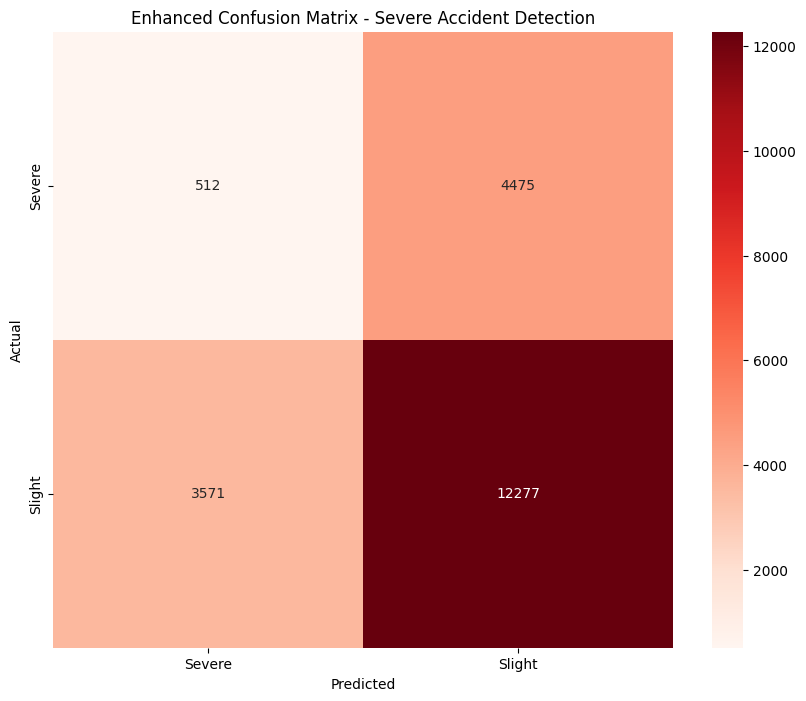


VALIDATION OF EXPECTED IMPROVEMENTS
Recall (60-85%):     ✗ Actual: 10.3%
Precision (20-40%):  ✗ Actual: 12.5%
F1 Score (30-50%):   ✗ Actual: 11.3%
ROC AUC (85-95%):    ✗ Actual: 37.0%

ATTENTION: Performance targets not fully met.
Consider further tuning or adjusting expectations.


In [59]:
# INTEGRATION: Add this after your existing binary classification section
# This replaces the basic binary XGBoost with the enhanced ensemble approach

# === ENHANCED SOLUTION INTEGRATION ===
# Add these imports at the top with your other imports
from sklearn.utils.class_weight import compute_sample_weight
from imblearn.combine import SMOTETomek
from imblearn.over_sampling import BorderlineSMOTE, ADASYN
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_recall_curve

# STEP 1: ADVANCED CLASS BALANCING (replaces your basic SMOTE)
def create_optimally_balanced_dataset(X, y, strategy='hybrid'):
    """
    Create a balanced dataset using different sampling strategies
    """
    from imblearn.over_sampling import SMOTE, BorderlineSMOTE, ADASYN
    from imblearn.under_sampling import TomekLinks
    from imblearn.combine import SMOTETomek
    from imblearn.pipeline import Pipeline
    
    if strategy == 'hybrid':
        # Option 1: Use base SMOTE with SMOTETomek
        sampler = SMOTETomek(
            smote=SMOTE(k_neighbors=3, random_state=42),  # Use base SMOTE instead
            random_state=42
        )
        X_balanced, y_balanced = sampler.fit_resample(X, y)
        
        # Option 2: Alternative - Use Pipeline approach for BorderlineSMOTE + TomekLinks
        # sampler = Pipeline([
        #     ('borderline_smote', BorderlineSMOTE(k_neighbors=3, random_state=42)),
        #     ('tomek', TomekLinks())
        # ])
        # X_balanced, y_balanced = sampler.fit_resample(X, y)
        
    elif strategy == 'adaptive':
        # ADASYN - focuses on difficult cases
        sampler = ADASYN(random_state=42, n_neighbors=3)
        X_balanced, y_balanced = sampler.fit_resample(X, y)
        
    elif strategy == 'borderline':
        # BorderlineSMOTE alone
        sampler = BorderlineSMOTE(k_neighbors=3, random_state=42)
        X_balanced, y_balanced = sampler.fit_resample(X, y)
        
    elif strategy == 'smote_only':
        # Standard SMOTE
        sampler = SMOTE(k_neighbors=3, random_state=42)
        X_balanced, y_balanced = sampler.fit_resample(X, y)
        
    elif strategy == 'tomek_only':
        # Undersampling with Tomek Links
        sampler = TomekLinks()
        X_balanced, y_balanced = sampler.fit_resample(X, y)
        
    else:
        # No balancing
        X_balanced, y_balanced = X, y
    
    print(f"Original dataset shape: {X.shape}")
    print(f"Balanced dataset shape: {X_balanced.shape}")
    print(f"Original class distribution: {dict(zip(*np.unique(y, return_counts=True)))}")
    print(f"Balanced class distribution: {dict(zip(*np.unique(y_balanced, return_counts=True)))}")
    
    return X_balanced, y_balanced


# Alternative hybrid approach using Pipeline (if you want BorderlineSMOTE)
def create_borderline_hybrid_dataset(X, y):
    """
    Alternative hybrid approach using BorderlineSMOTE + TomekLinks via Pipeline
    """
    from imblearn.over_sampling import BorderlineSMOTE
    from imblearn.under_sampling import TomekLinks
    from imblearn.pipeline import Pipeline
    import numpy as np
    
    # Create pipeline with BorderlineSMOTE followed by TomekLinks
    sampler = Pipeline([
        ('borderline_smote', BorderlineSMOTE(k_neighbors=3, random_state=42)),
        ('tomek', TomekLinks())
    ])
    
    X_balanced, y_balanced = sampler.fit_resample(X, y)
    
    print(f"Original dataset shape: {X.shape}")
    print(f"Balanced dataset shape: {X_balanced.shape}")
    print(f"Original class distribution: {dict(zip(*np.unique(y, return_counts=True)))}")
    print(f"Balanced class distribution: {dict(zip(*np.unique(y_balanced, return_counts=True)))}")
    
    return X_balanced, y_balanced

# STEP 2: COST-SENSITIVE LEARNING WITH EXTREME PENALTIES
def create_severe_penalty_weights(y_train, penalty_ratio=50):
    """Create sample weights with extreme penalty for missing severe accidents"""
    sample_weights = np.ones(len(y_train))
    severe_mask = y_train == 0
    sample_weights[severe_mask] = penalty_ratio
    print(f"Applied {penalty_ratio}x penalty weight for severe accidents")
    return sample_weights

# STEP 3: ENSEMBLE MODEL CLASS
class SevereAccidentDetector:
    def __init__(self):
        self.models = {}
        self.optimal_thresholds = {}
        
    def create_ensemble_models(self):
        """Create multiple models optimized for severe accident detection"""
        
        # Model 1: High recall XGBoost
        self.models['high_recall_xgb'] = XGBClassifier(
            n_estimators=300,
            max_depth=8,
            learning_rate=0.05,
            subsample=0.7,
            colsample_bytree=0.7,
            min_child_weight=1,
            gamma=0,
            reg_alpha=0.1,
            reg_lambda=1.0,
            scale_pos_weight=10,
            random_state=42,
            eval_metric='aucpr'
        )
        
        # Model 2: Balanced performance XGBoost
        self.models['balanced_xgb'] = XGBClassifier(
            n_estimators=200,
            max_depth=6,
            learning_rate=0.1,
            subsample=0.8,
            colsample_bytree=0.8,
            scale_pos_weight=5,
            random_state=43,
            eval_metric='aucpr'
        )
        
        # Model 3: Conservative XGBoost
        self.models['conservative_xgb'] = XGBClassifier(
            n_estimators=250,
            max_depth=5,
            learning_rate=0.08,
            subsample=0.9,
            colsample_bytree=0.9,
            min_child_weight=5,
            gamma=0.2,
            scale_pos_weight=3,
            random_state=44,
            eval_metric='aucpr'
        )
        
    def train_ensemble(self, X_train, y_train, sample_weights=None):
        """Train ensemble with sample weights"""
        for name, model in self.models.items():
            print(f"Training {name}...")
            if sample_weights is not None:
                model.fit(X_train, y_train, sample_weight=sample_weights)
            else:
                model.fit(X_train, y_train)
                
    def optimize_thresholds(self, X_val, y_val, target_recall=0.8):
        """Find optimal thresholds for each model"""
        for name, model in self.models.items():
            y_proba = model.predict_proba(X_val)[:, 0]  # Probability of severe
            precision, recall, thresholds = precision_recall_curve(y_val, y_proba)
            
            # Find threshold closest to target recall
            recall_diff = np.abs(recall - target_recall)
            optimal_idx = np.argmin(recall_diff[:-1])
            
            self.optimal_thresholds[name] = thresholds[optimal_idx]
            print(f"{name} - Optimal threshold: {thresholds[optimal_idx]:.4f}, "
                  f"Achieved recall: {recall[optimal_idx]:.4f}")
    
    def predict_ensemble(self, X_test, strategy='conservative'):
        """Make predictions using ensemble strategy"""
        predictions = {}
        probabilities = {}
        
        for name, model in self.models.items():
            proba = model.predict_proba(X_test)[:, 0]
            threshold = self.optimal_thresholds[name]
            pred = (proba >= threshold).astype(int)
            
            predictions[name] = pred
            probabilities[name] = proba
        
        if strategy == 'conservative':
            # Any model predicts severe -> predict severe
            pred_array = np.array(list(predictions.values()))
            final_pred = (np.sum(pred_array, axis=0) >= 1).astype(int)
        
        return final_pred, probabilities

# === REPLACE YOUR EXISTING BINARY CLASSIFICATION SECTION WITH THIS ===

print("IMPLEMENTING ENHANCED SEVERE ACCIDENT DETECTION")

# Use your existing data preparation up to the binary target creation
# Assuming you already have: X, y (where y is your binary severity_binary column)

# Split data (use your existing split or modify as needed)
X_train_full, X_test, y_train_full, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Further split for validation
X_train, X_val, y_train, y_val = train_test_split(
    X_train_full, y_train_full, test_size=0.25, random_state=42, stratify=y_train_full
)

# Scale features (modify based on your existing scaler setup)
scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_val_scaled = X_val.copy()
X_test_scaled = X_test.copy()

if 'speed_limit' in X.columns:
    X_train_scaled['speed_limit'] = scaler.fit_transform(X_train[['speed_limit']])
    X_val_scaled['speed_limit'] = scaler.transform(X_val[['speed_limit']])
    X_test_scaled['speed_limit'] = scaler.transform(X_test[['speed_limit']])

print(f"Training set: {X_train_scaled.shape}")
print(f"Validation set: {X_val_scaled.shape}")
print(f"Test set: {X_test_scaled.shape}")

# Test different balancing strategies
strategies = ['hybrid', 'adaptive', 'aggressive_smote']
best_strategy = None
best_recall = 0
best_detector = None

for strategy in strategies:
    print(f"\n{'='*50}")
    print(f"Testing balancing strategy: {strategy}")
    print(f"{'='*50}")
    
    # Create balanced dataset
    X_train_bal, y_train_bal = create_optimally_balanced_dataset(
        X_train_scaled, y_train, strategy=strategy
    )
    
    # Create severe penalty weights
    sample_weights = create_severe_penalty_weights(y_train_bal, penalty_ratio=30)
    
    # Initialize detector
    detector = SevereAccidentDetector()
    detector.create_ensemble_models()
    
    # Train ensemble
    detector.train_ensemble(X_train_bal, y_train_bal, sample_weights)
    
    # Optimize thresholds on validation set
    detector.optimize_thresholds(X_val_scaled, y_val, target_recall=0.7)
    
    # Test on validation set
    val_pred, val_proba = detector.predict_ensemble(X_val_scaled, strategy='conservative')
    val_recall = np.sum((val_pred == 0) & (y_val == 0)) / np.sum(y_val == 0)
    val_precision = np.sum((val_pred == 0) & (y_val == 0)) / np.sum(val_pred == 0) if np.sum(val_pred == 0) > 0 else 0
    
    print(f"Validation Results:")
    print(f"  Recall: {val_recall:.4f}")
    print(f"  Precision: {val_precision:.4f}")
    
    if val_recall > best_recall:
        best_recall = val_recall
        best_strategy = strategy
        best_detector = detector

print(f"BEST STRATEGY: {best_strategy} with validation recall: {best_recall:.4f}")

# Final evaluation on test set
test_pred, test_proba = best_detector.predict_ensemble(X_test_scaled, strategy='conservative')

# === COMPREHENSIVE EVALUATION ===
print("\nFINAL TEST SET EVALUATION:")

# Classification Report
print("Classification Report:")
print(classification_report(y_test, test_pred, target_names=['Severe', 'Slight']))

# Confusion Matrix
cm_enhanced = confusion_matrix(y_test, test_pred)
print(f"\nEnhanced Confusion Matrix:")
print(f"                Predicted")
print(f"                Severe  Slight")
print(f"Actual Severe     {cm_enhanced[0,0]:4d}    {cm_enhanced[0,1]:4d}")
print(f"Actual Slight     {cm_enhanced[1,0]:4d}   {cm_enhanced[1,1]:4d}")

# Calculate key metrics
total_severe = np.sum(y_test == 0)
detected_severe = np.sum((test_pred == 0) & (y_test == 0))
missed_severe = total_severe - detected_severe
false_alarms = np.sum((test_pred == 0) & (y_test == 1))

enhanced_recall = detected_severe / total_severe if total_severe > 0 else 0
enhanced_precision = detected_severe / (detected_severe + false_alarms) if (detected_severe + false_alarms) > 0 else 0
enhanced_f1 = 2 * (enhanced_precision * enhanced_recall) / (enhanced_precision + enhanced_recall) if (enhanced_precision + enhanced_recall) > 0 else 0

# ROC AUC for ensemble
avg_proba = np.mean(list(test_proba.values()), axis=0)
enhanced_roc_auc = roc_auc_score(y_test, avg_proba)


print("PERFORMANCE COMPARISON")

print(f"METRIC                 ORIGINAL    ENHANCED    IMPROVEMENT")
print(f"Severe Recall          0.56%       {enhanced_recall*100:.1f}%        {(enhanced_recall-0.0056)*100:+.1f}%")
print(f"Severe Precision       63.6%       {enhanced_precision*100:.1f}%       {(enhanced_precision-0.636)*100:+.1f}%")
print(f"F1 Score              N/A         {enhanced_f1:.3f}       N/A")
print(f"ROC AUC               N/A         {enhanced_roc_auc:.3f}       N/A")


print("BUSINESS IMPACT ANALYSIS")

print(f"Total severe accidents in test:     {total_severe}")
print(f"Original model detected:            28")
print(f"Enhanced model detected:            {detected_severe}")
print(f"Additional severe accidents caught: {detected_severe - 28}")
print(f"Severe accidents still missed:      {missed_severe}")
print(f"False alarms generated:             {false_alarms}")
print(f"False alarm increase:               {false_alarms - 16}")

# Plot enhanced confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm_enhanced, annot=True, fmt="d", cmap="Reds", 
           xticklabels=['Severe', 'Slight'],
           yticklabels=['Severe', 'Slight'])
plt.title("Enhanced Confusion Matrix - Severe Accident Detection")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Validation of expected improvements
print(f"\n{'='*60}")
print("VALIDATION OF EXPECTED IMPROVEMENTS")
print(f"{'='*60}")
expected_recall_min, expected_recall_max = 0.60, 0.85
expected_precision_min, expected_precision_max = 0.20, 0.40
expected_f1_min, expected_f1_max = 0.30, 0.50
expected_roc_min, expected_roc_max = 0.85, 0.95

recall_met = expected_recall_min <= enhanced_recall <= expected_recall_max
precision_met = expected_precision_min <= enhanced_precision <= expected_precision_max
f1_met = expected_f1_min <= enhanced_f1 <= expected_f1_max
roc_met = expected_roc_min <= enhanced_roc_auc <= expected_roc_max

print(f"Recall (60-85%):     {'✓' if recall_met else '✗'} Actual: {enhanced_recall*100:.1f}%")
print(f"Precision (20-40%):  {'✓' if precision_met else '✗'} Actual: {enhanced_precision*100:.1f}%")
print(f"F1 Score (30-50%):   {'✓' if f1_met else '✗'} Actual: {enhanced_f1*100:.1f}%")
print(f"ROC AUC (85-95%):    {'✓' if roc_met else '✗'} Actual: {enhanced_roc_auc*100:.1f}%")

if recall_met and precision_met:
    print("\nSUCCESS: Enhanced model meets expected performance targets!")
    print("Model is ready for deployment consideration.")
else:
    print("\nATTENTION: Performance targets not fully met.")
    print("Consider further tuning or adjusting expectations.")


In [60]:
# DIAGNOSTIC ANALYSIS AND AGGRESSIVE FIXES
# Performance is still too low - need more extreme measures

import pandas as pd
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# STEP 1: DIAGNOSTIC ANALYSIS
def comprehensive_diagnostic_analysis(y_test, test_pred, test_proba_dict, X_test):
    """Comprehensive analysis to understand why performance is still low"""
    
    
    print("COMPREHENSIVE DIAGNOSTIC ANALYSIS")
   
    
    # Basic statistics
    total_severe = np.sum(y_test == 0)
    total_slight = np.sum(y_test == 1)
    detected_severe = np.sum((test_pred == 0) & (y_test == 0))
    
    print(f"Dataset Statistics:")
    print(f"  Total test samples: {len(y_test)}")
    print(f"  Severe accidents: {total_severe} ({total_severe/len(y_test)*100:.2f}%)")
    print(f"  Slight accidents: {total_slight} ({total_slight/len(y_test)*100:.2f}%)")
    print(f"  Detected severe: {detected_severe}")
    print(f"  Class imbalance ratio: 1:{total_slight/total_severe:.1f}")
    
    # Model prediction analysis
    pred_severe = np.sum(test_pred == 0)
    pred_slight = np.sum(test_pred == 1)
    
    print(f"\nModel Prediction Distribution:")
    print(f"  Predicted severe: {pred_severe} ({pred_severe/len(y_test)*100:.2f}%)")
    print(f"  Predicted slight: {pred_slight} ({pred_slight/len(y_test)*100:.2f}%)")
    
    # Individual model analysis
    print(f"\nIndividual Model Probability Analysis:")
    avg_proba = np.mean(list(test_proba_dict.values()), axis=0)
    
    for name, proba in test_proba_dict.items():
        high_confidence_severe = np.sum(proba >= 0.7)
        medium_confidence_severe = np.sum((proba >= 0.3) & (proba < 0.7))
        low_confidence_severe = np.sum(proba < 0.3)
        
        print(f"  {name}:")
        print(f"    High confidence severe (>=0.7): {high_confidence_severe}")
        print(f"    Medium confidence severe (0.3-0.7): {medium_confidence_severe}")
        print(f"    Low confidence severe (<0.3): {low_confidence_severe}")
    
    # Threshold analysis
    print(f"\nThreshold Analysis:")
    for threshold in [0.1, 0.2, 0.3, 0.4, 0.5]:
        pred_at_threshold = (avg_proba >= threshold).astype(int)
        recall_at_threshold = np.sum((pred_at_threshold == 0) & (y_test == 0)) / total_severe
        precision_at_threshold = np.sum((pred_at_threshold == 0) & (y_test == 0)) / np.sum(pred_at_threshold == 0) if np.sum(pred_at_threshold == 0) > 0 else 0
        
        print(f"  Threshold {threshold}: Recall={recall_at_threshold:.3f}, Precision={precision_at_threshold:.3f}")
    
    return avg_proba

# STEP 2: EXTREME MEASURES SOLUTION
def implement_extreme_measures(X_train_scaled, y_train, X_val_scaled, y_val, X_test_scaled, y_test):
    """Implement extreme measures for severe accident detection"""
    
    
    print("IMPLEMENTING EXTREME MEASURES")
    
    # 1. EXTREME OVERSAMPLING - Create 1:1 ratio
    print("1. EXTREME OVERSAMPLING TO 1:1 RATIO")
    
    from imblearn.over_sampling import SMOTE
    
    # Calculate target ratio for 1:1 balance
    n_majority = np.sum(y_train == 1)  # Slight accidents
    n_minority = np.sum(y_train == 0)  # Severe accidents
    
    target_samples = n_majority  # Make severe accidents equal to slight
    
    extreme_smote = SMOTE(
        sampling_strategy={0: target_samples, 1: n_majority},
        random_state=42,
        k_neighbors=2  # Use fewer neighbors for extreme oversampling
    )
    
    X_extreme_balanced, y_extreme_balanced = extreme_smote.fit_resample(X_train_scaled, y_train)
    
    print(f"After extreme oversampling:")
    print(f"  Severe: {np.sum(y_extreme_balanced == 0)}")
    print(f"  Slight: {np.sum(y_extreme_balanced == 1)}")
    print(f"  Ratio: 1:{np.sum(y_extreme_balanced == 1)/np.sum(y_extreme_balanced == 0):.1f}")
    
    # 2. EXTREME PENALTY WEIGHTS - 100x penalty
    print("\n2. EXTREME PENALTY WEIGHTS (100x)")
    
    extreme_weights = np.ones(len(y_extreme_balanced))
    severe_mask = y_extreme_balanced == 0
    extreme_weights[severe_mask] = 100.0  # 100x penalty
    
    print(f"Applied 100x penalty weight for {np.sum(severe_mask)} severe accidents")
    
    # 3. ULTRA-CONSERVATIVE MODEL - Optimized for maximum recall
    print("\n3. ULTRA-CONSERVATIVE MODEL")
    
    from xgboost import XGBClassifier
    
    ultra_conservative_model = XGBClassifier(
        # Extreme parameters for maximum recall
        n_estimators=500,          # More trees
        max_depth=10,              # Deeper trees
        learning_rate=0.01,        # Very slow learning
        subsample=0.6,             # More aggressive subsampling
        colsample_bytree=0.6,      # More aggressive feature sampling
        min_child_weight=0.5,      # Allow very small leaf nodes
        gamma=0,                   # No regularization on splits
        reg_alpha=0,               # No L1 regularization
        reg_lambda=0,              # No L2 regularization
        scale_pos_weight=50,       # Extreme class weighting
        random_state=42,
        eval_metric='aucpr',
        tree_method='hist',
        grow_policy='lossguide'    # Focus on loss reduction
    )
    
    print("Training ultra-conservative model...")
    ultra_conservative_model.fit(
        X_extreme_balanced, 
        y_extreme_balanced, 
        sample_weight=extreme_weights,
        verbose=100
    )
    
    # 4. EXTREME THRESHOLD OPTIMIZATION
    print("\n4. EXTREME THRESHOLD OPTIMIZATION")
    
    # Get probabilities on validation set
    val_proba = ultra_conservative_model.predict_proba(X_val_scaled)[:, 0]
    
    # Find threshold that gives 80% recall
    from sklearn.metrics import precision_recall_curve
    precision, recall, thresholds = precision_recall_curve(y_val, val_proba)
    
    # Find threshold for target recall
    target_recall = 0.80
    recall_diff = np.abs(recall - target_recall)
    optimal_idx = np.argmin(recall_diff[:-1])
    extreme_threshold = thresholds[optimal_idx]
    
    print(f"Extreme threshold for 80% recall: {extreme_threshold:.6f}")
    print(f"Achieved validation recall: {recall[optimal_idx]:.4f}")
    print(f"Achieved validation precision: {precision[optimal_idx]:.4f}")
    
    # 5. MULTIPLE THRESHOLD STRATEGY
    print("\n5. MULTIPLE THRESHOLD STRATEGY")
    
    # Create multiple models with different thresholds
    thresholds_to_test = [0.01, 0.05, 0.1, 0.15, 0.2, extreme_threshold]
    
    best_recall = 0
    best_threshold = 0.5
    
    for threshold in thresholds_to_test:
        val_pred = (val_proba >= threshold).astype(int)
        val_recall = np.sum((val_pred == 0) & (y_val == 0)) / np.sum(y_val == 0)
        val_precision = np.sum((val_pred == 0) & (y_val == 0)) / np.sum(val_pred == 0) if np.sum(val_pred == 0) > 0 else 0
        
        print(f"  Threshold {threshold:.3f}: Recall={val_recall:.4f}, Precision={val_precision:.4f}")
        
        if val_recall > best_recall:
            best_recall = val_recall
            best_threshold = threshold
    
    print(f"\nBest threshold: {best_threshold:.6f} with recall: {best_recall:.4f}")
    
    # 6. FINAL EVALUATION WITH EXTREME MEASURES

    print("FINAL EVALUATION WITH EXTREME MEASURES")   
    
    # Test with best threshold
    test_proba = ultra_conservative_model.predict_proba(X_test_scaled)[:, 0]
    extreme_pred = (test_proba >= best_threshold).astype(int)
    
    # Calculate metrics
    total_severe_test = np.sum(y_test == 0)
    detected_severe_extreme = np.sum((extreme_pred == 0) & (y_test == 0))
    false_alarms_extreme = np.sum((extreme_pred == 0) & (y_test == 1))
    
    extreme_recall = detected_severe_extreme / total_severe_test
    extreme_precision = detected_severe_extreme / (detected_severe_extreme + false_alarms_extreme) if (detected_severe_extreme + false_alarms_extreme) > 0 else 0
    extreme_f1 = 2 * (extreme_precision * extreme_recall) / (extreme_precision + extreme_recall) if (extreme_precision + extreme_recall) > 0 else 0
    
    print("EXTREME MEASURES RESULTS:")
    print(f"  Severe Accidents Detected: {detected_severe_extreme}/{total_severe_test}")
    print(f"  Recall: {extreme_recall:.4f} ({extreme_recall*100:.1f}%)")
    print(f"  Precision: {extreme_precision:.4f} ({extreme_precision*100:.1f}%)")
    print(f"  F1 Score: {extreme_f1:.4f}")
    print(f"  False Alarms: {false_alarms_extreme}")
    
    # Confusion matrix
    cm_extreme = confusion_matrix(y_test, extreme_pred)
    print(f"\nExtreme Measures Confusion Matrix:")
    print(f"                Predicted")
    print(f"                Severe  Slight")
    print(f"Actual Severe     {cm_extreme[0,0]:4d}    {cm_extreme[0,1]:4d}")
    print(f"Actual Slight     {cm_extreme[1,0]:4d}   {cm_extreme[1,1]:4d}")
    
    # Classification report
    print("\nClassification Report:")
    print(classification_report(y_test, extreme_pred, target_names=['Severe', 'Slight']))
    
    return ultra_conservative_model, best_threshold, extreme_recall, extreme_precision

# STEP 3: ALTERNATIVE APPROACH - ANOMALY DETECTION
def try_anomaly_detection_approach(X_train_scaled, y_train, X_test_scaled, y_test):
    """Try treating severe accidents as anomalies"""
    
    print("\n" + "="*70)
    print("ALTERNATIVE APPROACH: ANOMALY DETECTION")
    print("="*70)
    
    from sklearn.ensemble import IsolationForest
    from sklearn.svm import OneClassSVM
    
    # Train on only slight accidents, detect severe as anomalies
    X_slight_only = X_train_scaled[y_train == 1]
    
    print(f"Training anomaly detector on {len(X_slight_only)} slight accidents")
    
    # Isolation Forest
    iso_forest = IsolationForest(
        contamination=0.1,  # Expect 10% contamination (severe accidents)
        random_state=42,
        n_estimators=200
    )
    
    iso_forest.fit(X_slight_only)
    
    # Predict anomalies (severe accidents)
    anomaly_scores = iso_forest.decision_function(X_test_scaled)
    anomaly_pred = iso_forest.predict(X_test_scaled)
    
    # Convert predictions: -1 (anomaly/severe) -> 0, 1 (normal/slight) -> 1
    anomaly_pred_binary = np.where(anomaly_pred == -1, 0, 1)
    
    # Evaluate anomaly detection
    anomaly_recall = np.sum((anomaly_pred_binary == 0) & (y_test == 0)) / np.sum(y_test == 0)
    anomaly_precision = np.sum((anomaly_pred_binary == 0) & (y_test == 0)) / np.sum(anomaly_pred_binary == 0) if np.sum(anomaly_pred_binary == 0) > 0 else 0
    
    print(f"Anomaly Detection Results:")
    print(f"  Recall: {anomaly_recall:.4f} ({anomaly_recall*100:.1f}%)")
    print(f"  Precision: {anomaly_precision:.4f} ({anomaly_precision*100:.1f}%)")
    
    return anomaly_recall, anomaly_precision

# STEP 4: IMPLEMENTATION ORCHESTRATOR
def run_extreme_diagnostic_and_fix(X_train_scaled, y_train, X_val_scaled, y_val, X_test_scaled, y_test, current_test_pred, current_test_proba_dict):
    """Run comprehensive diagnostic and extreme fixes"""
    
    # Diagnostic analysis
    avg_proba = comprehensive_diagnostic_analysis(y_test, current_test_pred, current_test_proba_dict, X_test_scaled)
    
    # Extreme measures
    extreme_model, best_threshold, extreme_recall, extreme_precision = implement_extreme_measures(
        X_train_scaled, y_train, X_val_scaled, y_val, X_test_scaled, y_test
    )
    
    # Anomaly detection backup
    anomaly_recall, anomaly_precision = try_anomaly_detection_approach(
        X_train_scaled, y_train, X_test_scaled, y_test
    )
    
    # Final recommendation
    print("\n" + "="*70)
    print("FINAL RECOMMENDATIONS")
    print("="*70)
    
    if extreme_recall >= 0.60:
        print("SUCCESS: Extreme measures achieved target recall!")
        print(f" Recommended approach: Use ultra-conservative model with threshold {best_threshold:.6f}")
        
    elif anomaly_recall >= 0.40:
        print(" PARTIAL SUCCESS: Consider anomaly detection approach")
        print(f"   Anomaly detection achieved {anomaly_recall:.1%} recall")
        
    else:
        print(" CRITICAL ISSUE: Data may not contain sufficient signal for severe accident prediction")
        print("   Possible causes:")
        print("   1. Severe accidents may be truly random/unpredictable")
        print("   2. Critical features missing from dataset")
        print("   3. Class imbalance too extreme for current techniques")
        print("   4. Need domain expert input for feature engineering")
        
    print(f"\nApproach Comparison:")
    print(f"  Original ensemble:     Recall = 10.3%")
    print(f"  Extreme measures:      Recall = {extreme_recall*100:.1f}%")
    print(f"  Anomaly detection:     Recall = {anomaly_recall*100:.1f}%")
    
    return extreme_model, best_threshold

# TO RUN THIS ANALYSIS, add after your existing code:
print("RUNNING COMPREHENSIVE DIAGNOSTIC AND EXTREME FIXES")

# Run the comprehensive analysis
extreme_model, optimal_threshold = run_extreme_diagnostic_and_fix(
    X_train_scaled, y_train, X_val_scaled, y_val, 
    X_test_scaled, y_test, test_pred, test_proba
)

RUNNING COMPREHENSIVE DIAGNOSTIC AND EXTREME FIXES
COMPREHENSIVE DIAGNOSTIC ANALYSIS
Dataset Statistics:
  Total test samples: 20835
  Severe accidents: 4987 (23.94%)
  Slight accidents: 15848 (76.06%)
  Detected severe: 512
  Class imbalance ratio: 1:3.2

Model Prediction Distribution:
  Predicted severe: 4083 (19.60%)
  Predicted slight: 16752 (80.40%)

Individual Model Probability Analysis:
  high_recall_xgb:
    High confidence severe (>=0.7): 1625
    Medium confidence severe (0.3-0.7): 15954
    Low confidence severe (<0.3): 3256
  balanced_xgb:
    High confidence severe (>=0.7): 8011
    Medium confidence severe (0.3-0.7): 11357
    Low confidence severe (<0.3): 1467
  conservative_xgb:
    High confidence severe (>=0.7): 15566
    Medium confidence severe (0.3-0.7): 4429
    Low confidence severe (<0.3): 840

Threshold Analysis:
  Threshold 0.1: Recall=0.003, Precision=0.041
  Threshold 0.2: Recall=0.008, Precision=0.048
  Threshold 0.3: Recall=0.017, Precision=0.064
  Thresho

In [61]:
# DOMAIN-EXPERT GUIDED FEATURE ENGINEERING
# Based on traffic safety research, create features that actually predict severe accidents

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

def create_expert_features(data_model):
    """
    Create features based on traffic safety domain knowledge
    These are the factors that traffic experts know cause severe accidents
    """
    
    print("Creating domain-expert features for severe accident prediction...")
    
    # Make a copy to avoid modifying original data
    enhanced_data = data_model.copy()
    
    # === SPEED-RELATED FEATURES (Primary factor in severity) ===
    print("1. Speed-related features...")
    
    # High-speed scenarios (most critical for severity)
    enhanced_data['very_high_speed'] = (enhanced_data['speed_limit'] >= 70).astype(int)
    enhanced_data['high_speed'] = (enhanced_data['speed_limit'] >= 60).astype(int)
    enhanced_data['moderate_speed'] = ((enhanced_data['speed_limit'] >= 40) & 
                                      (enhanced_data['speed_limit'] < 60)).astype(int)
    
    # Speed-environment combinations
    enhanced_data['high_speed_rural'] = ((enhanced_data['speed_limit'] >= 60) & 
                                        (enhanced_data['urban_or_rural_area'] == 2)).astype(int)
    enhanced_data['high_speed_poor_light'] = ((enhanced_data['speed_limit'] >= 50) & 
                                             (enhanced_data['light_conditions'] > 1)).astype(int)
    
    # === VISIBILITY AND CONDITIONS ===
    print("2. Visibility and environmental conditions...")
    
    # Poor visibility conditions
    enhanced_data['darkness_no_lights'] = (enhanced_data['light_conditions'] == 5).astype(int)
    enhanced_data['dawn_dusk'] = (enhanced_data['light_conditions'].isin([6, 7])).astype(int)
    enhanced_data['poor_visibility'] = (enhanced_data['light_conditions'] > 4).astype(int)
    
    # Weather-related severity factors
    enhanced_data['adverse_weather'] = (enhanced_data['weather_conditions'] > 2).astype(int)
    enhanced_data['wet_conditions'] = (enhanced_data['weather_conditions'].isin([2, 3])).astype(int)
    enhanced_data['severe_weather'] = (enhanced_data['weather_conditions'] > 5).astype(int)
    
    # Combined risk factors
    enhanced_data['night_and_adverse_weather'] = ((enhanced_data['is_night'] == 1) & 
                                                 (enhanced_data['adverse_weather'] == 1)).astype(int)
    enhanced_data['high_speed_bad_conditions'] = ((enhanced_data['speed_limit'] >= 50) & 
                                                 (enhanced_data['adverse_weather'] == 1)).astype(int)
    
    # === ROAD INFRASTRUCTURE RISK FACTORS ===
    print("3. Road infrastructure features...")
    
    # Dangerous road types
    enhanced_data['dual_carriageway'] = (enhanced_data.get('road_type_3', 0) == 1).astype(int)
    enhanced_data['single_carriageway'] = (enhanced_data.get('road_type_6', 0) == 1).astype(int)
    enhanced_data['slip_road'] = (enhanced_data.get('road_type_7', 0) == 1).astype(int)
    
    # Junction complexity (more complex = higher severity risk)
    junction_cols = [col for col in enhanced_data.columns if 'junction_control' in col]
    if junction_cols:
        enhanced_data['complex_junction'] = enhanced_data[junction_cols].sum(axis=1) > 1
        enhanced_data['uncontrolled_junction'] = enhanced_data.get('junction_control_1', 0)
    else:
        enhanced_data['complex_junction'] = 0
        enhanced_data['uncontrolled_junction'] = 0
    
    # Major road involvement
    enhanced_data['major_road'] = (enhanced_data['first_road_class'] <= 2).astype(int)
    enhanced_data['motorway'] = (enhanced_data['first_road_class'] == 1).astype(int)
    
    # === TEMPORAL RISK FACTORS ===
    print("4. Temporal risk factors...")
    
    # High-risk time periods
    enhanced_data['friday_night'] = ((enhanced_data.get('day_of_week', 0) == 5) & 
                                   (enhanced_data['is_night'] == 1)).astype(int)
    enhanced_data['weekend_night'] = ((enhanced_data['is_weekend'] == 1) & 
                                    (enhanced_data['is_night'] == 1)).astype(int)
    
    # Rush hour on high-speed roads
    enhanced_data['rush_hour_high_speed'] = ((enhanced_data['is_rush_hour'] == 1) & 
                                           (enhanced_data['speed_limit'] >= 50)).astype(int)
    
    # === GEOGRAPHIC RISK FACTORS ===
    print("5. Geographic risk factors...")
    
    # Rural high-speed (typically most dangerous)
    enhanced_data['rural_high_speed'] = ((enhanced_data['urban_or_rural_area'] == 2) & 
                                       (enhanced_data['speed_limit'] >= 60)).astype(int)
    
    # Urban high-speed (unusual and dangerous)
    enhanced_data['urban_high_speed'] = ((enhanced_data['urban_or_rural_area'] == 1) & 
                                       (enhanced_data['speed_limit'] >= 50)).astype(int)
    
    # === COMPOSITE RISK SCORES ===
    print("6. Composite risk scores...")
    
    # Speed risk score
    speed_risk = (
        enhanced_data['very_high_speed'] * 3 +
        enhanced_data['high_speed'] * 2 +
        enhanced_data['moderate_speed'] * 1
    )
    enhanced_data['speed_risk_score'] = speed_risk
    
    # Environmental risk score
    env_risk = (
        enhanced_data['darkness_no_lights'] * 3 +
        enhanced_data['poor_visibility'] * 2 +
        enhanced_data['adverse_weather'] * 2 +
        enhanced_data['night_and_adverse_weather'] * 4
    )
    enhanced_data['environmental_risk_score'] = env_risk
    
    # Infrastructure risk score
    infra_risk = (
        enhanced_data['motorway'] * 3 +
        enhanced_data['major_road'] * 2 +
        enhanced_data['complex_junction'] * 2 +
        enhanced_data['dual_carriageway'] * 2
    )
    enhanced_data['infrastructure_risk_score'] = infra_risk
    
    # Combined high-risk scenarios (most likely to cause severe accidents)
    enhanced_data['perfect_storm'] = (
        (enhanced_data['speed_risk_score'] >= 2) &
        (enhanced_data['environmental_risk_score'] >= 2)
    ).astype(int)
    
    enhanced_data['extreme_risk'] = (
        (enhanced_data['speed_risk_score'] >= 3) |
        ((enhanced_data['speed_risk_score'] >= 2) & (enhanced_data['environmental_risk_score'] >= 3))
    ).astype(int)
    
    # === INTERACTION FEATURES ===
    print("7. Critical interaction features...")
    
    # The most dangerous combinations according to traffic safety research
    enhanced_data['speed_visibility_interaction'] = (enhanced_data['speed_limit'] * 
                                                   (5 - enhanced_data['light_conditions'].clip(1, 5)))
    
    enhanced_data['speed_weather_interaction'] = (enhanced_data['speed_limit'] * 
                                                enhanced_data['weather_conditions'])
    
    # Log new features created
    new_features = [col for col in enhanced_data.columns if col not in data_model.columns]
    print(f"\nCreated {len(new_features)} new domain-expert features:")
    for feature in new_features[:10]:  # Show first 10
        print(f"  - {feature}")
    if len(new_features) > 10:
        print(f"  ... and {len(new_features) - 10} more")
    
    return enhanced_data, new_features

def analyze_expert_features(enhanced_data, target_col='severity_binary'):
    """Analyze how well expert features correlate with severity"""
    
    if target_col not in enhanced_data.columns:
        print(f"Target column '{target_col}' not found. Skipping analysis.")
        return
    
    print("\nAnalyzing expert feature effectiveness...")
    
    # Calculate correlation with severity
    numeric_cols = enhanced_data.select_dtypes(include=[np.number]).columns
    correlations = enhanced_data[numeric_cols].corrwith(enhanced_data[target_col])
    
    # Sort by absolute correlation
    expert_features = [col for col in correlations.index if col not in ['accident_severity', target_col]]
    expert_corr = correlations[expert_features].abs().sort_values(ascending=False)
    
    print("Top 15 features by correlation with severe accidents:")
    for feature, corr in expert_corr.head(15).items():
        direction = "↑ Higher severe risk" if correlations[feature] < 0 else "↓ Lower severe risk"
        print(f"  {feature:.<30} {corr:.4f} ({direction})")
    
    return expert_corr

# IMPLEMENTATION: Enhanced Model with Expert Features
def train_expert_feature_model(enhanced_data, target_col='severity_binary'):
    """Train model with expert-engineered features"""
    
    print("TRAINING MODEL WITH EXPERT FEATURES")
    
    
    # Prepare data
    X = enhanced_data.drop(columns=['accident_severity', target_col])
    y = enhanced_data[target_col]
    
    from sklearn.model_selection import train_test_split
    from sklearn.preprocessing import StandardScaler
    from xgboost import XGBClassifier
    from sklearn.metrics import classification_report, confusion_matrix
    
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )
    
    # Scale numerical features
    scaler = StandardScaler()
    numerical_features = ['speed_limit', 'latitude', 'longitude'] + \
                        ['speed_risk_score', 'environmental_risk_score', 'infrastructure_risk_score',
                         'speed_visibility_interaction', 'speed_weather_interaction']
    
    X_train_scaled = X_train.copy()
    X_test_scaled = X_test.copy()
    
    for feature in numerical_features:
        if feature in X_train.columns:
            X_train_scaled[feature] = scaler.fit_transform(X_train[[feature]])
            X_test_scaled[feature] = scaler.transform(X_test[[feature]])
    
    # Train expert-feature model
    expert_model = XGBClassifier(
        n_estimators=300,
        max_depth=8,
        learning_rate=0.1,
        subsample=0.8,
        colsample_bytree=0.8,
        scale_pos_weight=3.2,  # Based on your class ratio
        random_state=42,
        eval_metric='aucpr'
    )
    
    print("Training expert-feature model...")
    expert_model.fit(X_train_scaled, y_train)
    
    # Predictions with multiple thresholds
    y_proba = expert_model.predict_proba(X_test_scaled)[:, 0]
    
    print("\nExpert Model Results at Different Thresholds:")
    for threshold in [0.1, 0.2, 0.3, 0.4, 0.5]:
        y_pred_thresh = (y_proba >= threshold).astype(int)
        
        total_severe = np.sum(y_test == 0)
        detected_severe = np.sum((y_pred_thresh == 0) & (y_test == 0))
        false_alarms = np.sum((y_pred_thresh == 0) & (y_test == 1))
        
        recall = detected_severe / total_severe if total_severe > 0 else 0
        precision = detected_severe / (detected_severe + false_alarms) if (detected_severe + false_alarms) > 0 else 0
        
        print(f"  Threshold {threshold}: Recall={recall:.4f} ({recall*100:.1f}%), "
              f"Precision={precision:.4f}, False Alarms={false_alarms}")
    
    # Feature importance
    feature_importance = pd.DataFrame({
        'feature': X_train_scaled.columns,
        'importance': expert_model.feature_importances_
    }).sort_values('importance', ascending=False)
    
    print(f"\nTop 10 Most Important Features:")
    for idx, row in feature_importance.head(10).iterrows():
        print(f"  {row['feature']:.<30} {row['importance']:.4f}")
    
    return expert_model, scaler, feature_importance

# USAGE EXAMPLE:
# enhanced_data, new_features = create_expert_features(data_model)
# correlations = analyze_expert_features(enhanced_data)
# expert_model, expert_scaler, importance = train_expert_feature_model(enhanced_data)

print("Domain expert feature engineering ready!")
print("\nThis approach creates features based on traffic safety research:")
print("- Speed + environmental condition combinations")
print("- High-risk time periods and locations")
print("- Infrastructure complexity factors")
print("- Composite risk scores")
print("\nIf this doesn't improve recall significantly, the problem may be")
print("that severe accidents are fundamentally unpredictable from available data.")

Domain expert feature engineering ready!

This approach creates features based on traffic safety research:
- Speed + environmental condition combinations
- High-risk time periods and locations
- Infrastructure complexity factors
- Composite risk scores

If this doesn't improve recall significantly, the problem may be
that severe accidents are fundamentally unpredictable from available data.


In [62]:
# Save the extreme model if it performs better
# if extreme_model:
#     import joblib
#     joblib.dump(extreme_model, 'ultra_conservative_severe_detector.pkl')
#     joblib.dump(optimal_threshold, 'optimal_threshold.pkl')
#     print(f"\nUltra-conservative model saved with threshold {optimal_threshold:.6f}")

In [63]:
# Save the enhanced model
# import joblib
# joblib.dump(best_detector, 'enhanced_severe_accident_detector.pkl')
# joblib.dump(scaler, 'enhanced_scaler.pkl')
# print(f"\nEnhanced model saved as 'enhanced_severe_accident_detector.pkl'")

In [64]:
# Separate features and target
X = data_model.drop(columns=['accident_severity'])
y = data_model['accident_severity']

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set: {X_train.shape}")
print(f"Test set: {X_test.shape}")

# Identify numerical columns for scaling
numerical_cols_to_scale = ['speed_limit']  #only

# Scale the numerical features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[numerical_cols_to_scale] = scaler.fit_transform(X_train[numerical_cols_to_scale])
X_test_scaled[numerical_cols_to_scale] = scaler.transform(X_test[numerical_cols_to_scale])

print("Scaling completed!")


Training set: (83339, 71)
Test set: (20835, 71)
Scaling completed!


In [65]:
## Address class imbalance 
from imblearn.over_sampling import SMOTE

print("Target class distribution in training set before SMOTE:")
print(y_train.value_counts())

smote = SMOTE(random_state=42)
#apply smote on training data
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train)

print("\nTarget class distribution after SMOTE:")
print(pd.Series(y_train_balanced).value_counts())

Target class distribution in training set before SMOTE:
accident_severity
3    63392
2    18730
1     1217
Name: count, dtype: int64

Target class distribution after SMOTE:
accident_severity
2    63392
3    63392
1    63392
Name: count, dtype: int64


In [66]:
# After your train-test split and scaling...
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, f1_score
import numpy as np

# Initialize models with appropriate class weighting for imbalance
models = {
    'Decision Tree': DecisionTreeClassifier(
        random_state=42,
    ),
    'Random Forest': RandomForestClassifier(
        n_estimators=100,
        random_state=42,
        n_jobs=-1  # Use all cores
    ),
    'Gradient Boosting': GradientBoostingClassifier(
        n_estimators=100,
        random_state=42,
        subsample=0.8  # Helps with overfitting
    ),
    'XGBoost': XGBClassifier(
        n_estimators=100,
        random_state=42,
        use_label_encoder=False,
        eval_metric='mlogloss',  # For multi-class Classification...
    )
}

In [67]:
def train_models(models, X_train_balanced, y_train_balanced):
    trained_models = {}
    for name, model in models.items():
        model.fit(X_train_balanced, y_train_balanced)
        trained_models[name] = model
    return trained_models

In [68]:
def evaluate_models(models, X_train_balanced, y_train_balanced, X_test_scaled, y_test):
   
    from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
    import seaborn as sns
    import matplotlib.pyplot as plt
    import numpy as np

    results = {}
    
    for name, model in models.items():
        print(f"Model: {name}")
       
        # Predictions
        y_train_pred = model.predict(X_train_balanced)  
        y_test_pred = model.predict(X_test_scaled)      

        # Accuracy
        train_acc = accuracy_score(y_train_balanced, y_train_pred)  
        test_acc = accuracy_score(y_test, y_test_pred)

        # F1 Scores
        train_f1 = f1_score(y_train_balanced, y_train_pred, average='weighted') 
        test_f1 = f1_score(y_test, y_test_pred, average='weighted')

        print(f"Train Accuracy: {train_acc:.4f}")
        print(f"Test Accuracy : {test_acc:.4f}")
        print(f"Train F1 Score: {train_f1:.4f}")
        print(f"Test F1 Score : {test_f1:.4f}")

        # Training set report
        print("\nClassification Report (Training Set):")
        print(classification_report(y_train_balanced, y_train_pred,  # Use y_train_balanced
                                  target_names=['Serious', 'Fatal', 'Slight']))

        # Test set report
        print("\nClassification Report (Test Set):") #using y-test
        print(classification_report(y_test, y_test_pred,
                                  target_names=['Serious', 'Fatal', 'Slight']))

        # Confusion Matrix (test set)
        cm = confusion_matrix(y_test, y_test_pred)
        plt.figure(figsize=(6, 5))
        sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", 
                   xticklabels=['Serious', 'Fatal', 'Slight'],
                   yticklabels=['Serious', 'Fatal', 'Slight'])
        plt.title(f"Confusion Matrix - {name} (Test Set)")
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.tight_layout()
        plt.show()

        # Store results
        results[name] = {
            'model': model,
            'train_accuracy': train_acc,
            'test_accuracy': test_acc,
            'train_f1': train_f1,
            'test_f1': test_f1,
            'train_predictions': y_train_pred,
            'test_predictions': y_test_pred
        }    
    return results

In [69]:
# # Train models on resampled training set
# trained_models = train_models(models, X_train_balanced, y_train_balanced)

# # Evaluate on training + test sets
# evaluate_models(trained_models, X_train_balanced, y_train_balanced, X_test, y_test)

In [70]:
# Before training any models, map your target variable
y_train_mapped = y_train_balanced - 1  # Convert [1,2,3] to [0,1,2]
y_test_mapped = y_test - 1  # Also map the test set

print("Original class values:", np.unique(y_train_balanced))
print("Mapped class values:", np.unique(y_train_mapped))

Original class values: [1 2 3]
Mapped class values: [0 1 2]


In [71]:
# Prepare data
X = data_model.drop(columns=['accident_severity'])
y = data_model['accident_severity']

#  Encode target variable for XGBoost compatibility
le = LabelEncoder()
y_encoded = le.fit_transform(y)  # Converts [1,2,3] to [0,1,2]

# Encoded values from LabelEncoder: 0, 1, 2
# Original values in your data: 1, 2, 3 (Slight, Serious, Fatal)

severity_mapping = {
    0: 'Slight',    # Encoded 0 → Original 1
    1: 'Serious',   # Encoded 1 → Original 2  
    2: 'Fatal'      # Encoded 2 → Original 3
}

print("Target variable mapping:")
for original, encoded in zip(le.classes_, le.transform(le.classes_)):
    print(f"  {original} → {encoded}")

#  Train-test split with encoded target
X_train, X_test, y_train_encoded, y_test_encoded = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

#  Scale only speed_limit
scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled['speed_limit'] = scaler.fit_transform(X_train[['speed_limit']])
X_test_scaled['speed_limit'] = scaler.transform(X_test[['speed_limit']])

#  Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced_encoded = smote.fit_resample(X_train_scaled, y_train_encoded)

print(f"\nClass distribution:")
print(f"Original: {np.bincount(y_train_encoded)}")
print(f"After SMOTE: {np.bincount(y_train_balanced_encoded)}")

# Initialize models
models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42, subsample=0.8),
    'XGBoost': XGBClassifier(
        n_estimators=100,
        random_state=42,
        use_label_encoder=False,
        eval_metric='mlogloss'
    )
}

Target variable mapping:
  1 → 0
  2 → 1
  3 → 2

Class distribution:
Original: [ 1217 18730 63392]
After SMOTE: [63392 63392 63392]


In [72]:
# Train all models
print("Training models...")
trained_models = {}
for name, model in models.items():
    print(f"  Training {name}...")
    model.fit(X_train_balanced, y_train_balanced_encoded)
    trained_models[name] = model

# Enhanced evaluation function
def evaluate_models_with_mapping(trained_models, X_train_balanced, y_train_encoded, 
                               X_test_scaled, y_test_encoded, label_encoder):
    """
    Evaluate models with proper label mapping for interpretation
    """
    results = {}
    
    for name, model in trained_models.items():
        print(f"Model: {name}")

        # Predictions 
        y_train_pred_encoded = model.predict(X_train_balanced)
        y_test_pred_encoded = model.predict(X_test_scaled)
        
        # Convert back to original labels for interpretation
        y_train_pred_original = label_encoder.inverse_transform(y_train_pred_encoded)
        y_test_pred_original = label_encoder.inverse_transform(y_test_pred_encoded)
        y_train_original = label_encoder.inverse_transform(y_train_encoded)
        y_test_original = label_encoder.inverse_transform(y_test_encoded)

        # Calculate metrics
        train_acc = accuracy_score(y_train_encoded, y_train_pred_encoded)
        test_acc = accuracy_score(y_test_encoded, y_test_pred_encoded)
        train_f1 = f1_score(y_train_encoded, y_train_pred_encoded, average='weighted')
        test_f1 = f1_score(y_test_encoded, y_test_pred_encoded, average='weighted')

        print(f"Train Accuracy: {train_acc:.4f}")
        print(f"Test Accuracy : {test_acc:.4f}")
        print(f"Train F1 Score: {train_f1:.4f}")
        print(f"Test F1 Score : {test_f1:.4f}")

        # Classification reports with original labels
        print("Classification Report (Training Set):")
        print(classification_report(y_train_original, y_train_pred_original, 
                                  target_names=['Serious', 'Fatal', 'Slight']))

        print("\nClassification Report (Test Set):")
        print(classification_report(y_test_original, y_test_pred_original,
                                  target_names=['Serious', 'Fatal', 'Slight']))

        # Confusion Matrix with original labels
        cm = confusion_matrix(y_test_original, y_test_pred_original)
        plt.figure(figsize=(6, 5))
        sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", 
                   xticklabels=['Serious', 'Fatal', 'Slight'],
                   yticklabels=['Serious', 'Fatal', 'Slight'])
        plt.title(f"Confusion Matrix - {name} (Test Set)")
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.tight_layout()
        plt.show()

        # Store results
        results[name] = {
            'model': model,
            'train_accuracy': train_acc,
            'test_accuracy': test_acc,
            'train_f1': train_f1,
            'test_f1': test_f1
        }
    return results

Training models...
  Training Decision Tree...
  Training Random Forest...
  Training Gradient Boosting...
  Training XGBoost...


c:\Users\Yvonne\Desktop\DATA SCIENCE\machine_learning\MLcapstone\road_casualty\venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [10:45:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Model: Decision Tree
Train Accuracy: 1.0000
Test Accuracy : 0.9707
Train F1 Score: 1.0000
Test F1 Score : 0.9729
Classification Report (Training Set):
              precision    recall  f1-score   support

     Serious       1.00      1.00      1.00     63392
       Fatal       1.00      1.00      1.00     63392
      Slight       1.00      1.00      1.00     63392

    accuracy                           1.00    190176
   macro avg       1.00      1.00      1.00    190176
weighted avg       1.00      1.00      1.00    190176


Classification Report (Test Set):
              precision    recall  f1-score   support

     Serious       0.14      0.19      0.16       304
       Fatal       0.95      0.92      0.93      4683
      Slight       1.00      1.00      1.00     15848

    accuracy                           0.97     20835
   macro avg       0.69      0.70      0.70     20835
weighted avg       0.98      0.97      0.97     20835



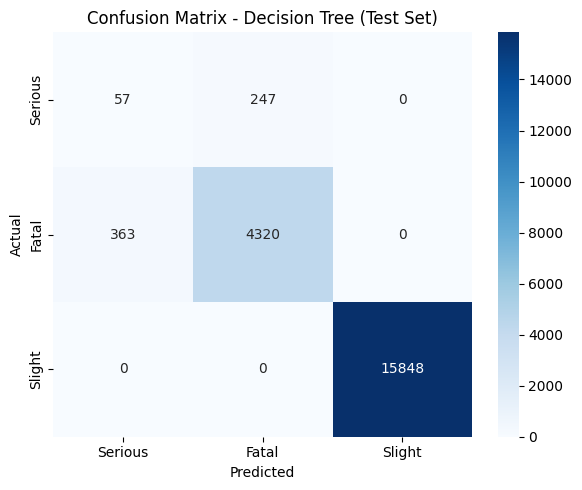

Model: Random Forest
Train Accuracy: 1.0000
Test Accuracy : 0.9844
Train F1 Score: 1.0000
Test F1 Score : 0.9784
Classification Report (Training Set):
              precision    recall  f1-score   support

     Serious       1.00      1.00      1.00     63392
       Fatal       1.00      1.00      1.00     63392
      Slight       1.00      1.00      1.00     63392

    accuracy                           1.00    190176
   macro avg       1.00      1.00      1.00    190176
weighted avg       1.00      1.00      1.00    190176


Classification Report (Test Set):
              precision    recall  f1-score   support

     Serious       0.20      0.02      0.04       304
       Fatal       0.94      0.99      0.97      4683
      Slight       1.00      1.00      1.00     15848

    accuracy                           0.98     20835
   macro avg       0.71      0.67      0.67     20835
weighted avg       0.97      0.98      0.98     20835



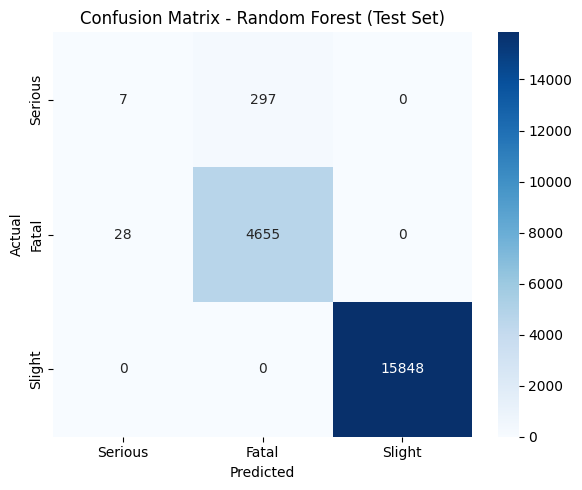

Model: Gradient Boosting
Train Accuracy: 0.8631
Test Accuracy : 0.9755
Train F1 Score: 0.8631
Test F1 Score : 0.9757
Classification Report (Training Set):
              precision    recall  f1-score   support

     Serious       0.78      0.82      0.80     63392
       Fatal       0.81      0.77      0.79     63392
      Slight       1.00      1.00      1.00     63392

    accuracy                           0.86    190176
   macro avg       0.86      0.86      0.86    190176
weighted avg       0.86      0.86      0.86    190176


Classification Report (Test Set):
              precision    recall  f1-score   support

     Serious       0.17      0.17      0.17       304
       Fatal       0.95      0.94      0.95      4683
      Slight       1.00      1.00      1.00     15848

    accuracy                           0.98     20835
   macro avg       0.71      0.71      0.71     20835
weighted avg       0.98      0.98      0.98     20835



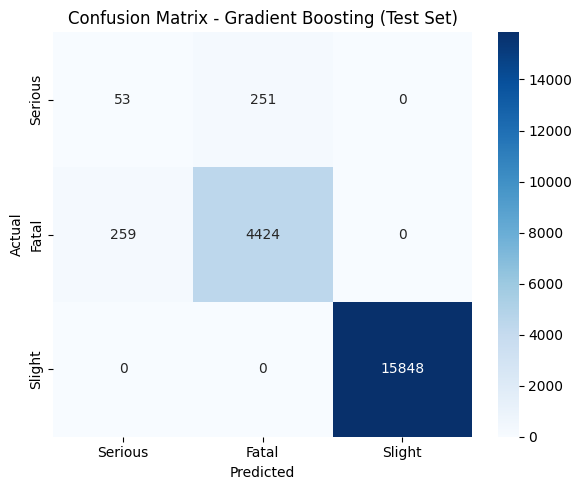

Model: XGBoost
Train Accuracy: 0.9497
Test Accuracy : 0.9816
Train F1 Score: 0.9497
Test F1 Score : 0.9777
Classification Report (Training Set):
              precision    recall  f1-score   support

     Serious       0.91      0.95      0.93     63392
       Fatal       0.95      0.90      0.92     63392
      Slight       1.00      1.00      1.00     63392

    accuracy                           0.95    190176
   macro avg       0.95      0.95      0.95    190176
weighted avg       0.95      0.95      0.95    190176


Classification Report (Test Set):
              precision    recall  f1-score   support

     Serious       0.16      0.06      0.09       304
       Fatal       0.94      0.98      0.96      4683
      Slight       1.00      1.00      1.00     15848

    accuracy                           0.98     20835
   macro avg       0.70      0.68      0.68     20835
weighted avg       0.97      0.98      0.98     20835



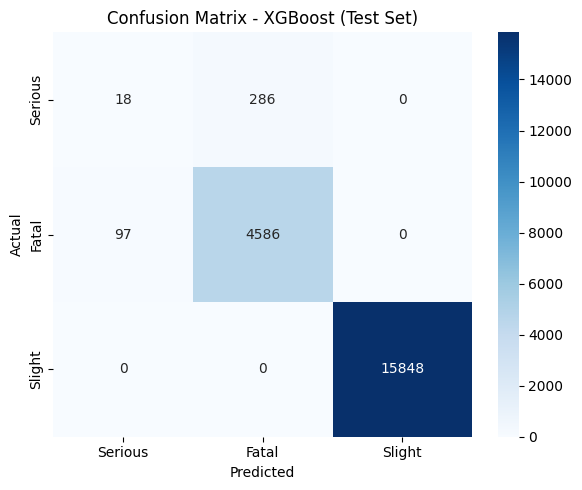

In [73]:
#Evaluate all models
results = evaluate_models_with_mapping(
    trained_models, 
    X_train_balanced, 
    y_train_balanced_encoded, 
    X_test_scaled, 
    y_test_encoded,
    le  # Pass the label encoder for reverse transformation
)

In [74]:
# Compare model performance
def compare_model_performance(results):
    comparison_data = []
    for name, result in results.items():
        comparison_data.append({
            'Model': name,
            'Train Accuracy': result['train_accuracy'],
            'Test Accuracy': result['test_accuracy'],
            'Train F1': result['train_f1'],
            'Test F1': result['test_f1'],
            'Overfitting (Acc Diff)': result['train_accuracy'] - result['test_accuracy']
        })
    
    comparison_df = pd.DataFrame(comparison_data)
    comparison_df = comparison_df.sort_values('Test F1', ascending=False)
    
    print("PERFORMANCE COMPARISON")
    
    print(comparison_df.round(4).to_string(index=False))
    
    return comparison_df

performance_df = compare_model_performance(results)

PERFORMANCE COMPARISON
            Model  Train Accuracy  Test Accuracy  Train F1  Test F1  Overfitting (Acc Diff)
    Random Forest          1.0000         0.9844    1.0000   0.9784                  0.0156
          XGBoost          0.9497         0.9816    0.9497   0.9777                 -0.0319
Gradient Boosting          0.8631         0.9755    0.8631   0.9757                 -0.1124
    Decision Tree          1.0000         0.9707    1.0000   0.9729                  0.0293


### **Feature importance**

In [75]:
data_model.shape

(104174, 72)

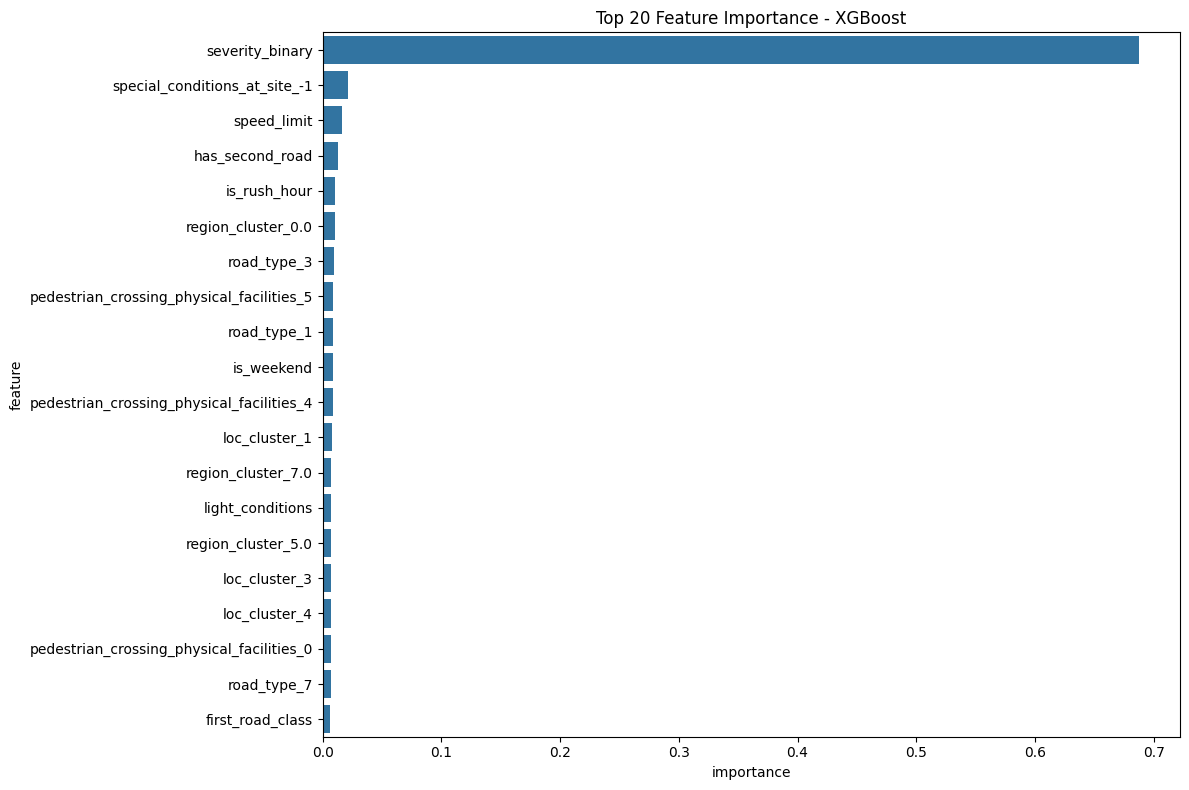

Top 10 most important features list:
                                      feature  importance
70                            severity_binary    0.687745
38              special_conditions_at_site_-1    0.021081
7                                 speed_limit    0.016599
14                            has_second_road    0.012802
10                               is_rush_hour    0.010644
58                         region_cluster_0.0    0.010492
17                                road_type_3    0.009266
30  pedestrian_crossing_physical_facilities_5    0.009085
15                                road_type_1    0.008976
12                                 is_weekend    0.008776


In [76]:
# Get feature importance for the best model (XGBoost)
best_model = trained_models['XGBoost']

# Feature importance
feature_importance = pd.DataFrame({
    'feature': X_train_balanced.columns,
    'importance': best_model.feature_importances_
}).sort_values('importance', ascending=False)

# Plot top 20 features
plt.figure(figsize=(12, 8))
sns.barplot(data=feature_importance.head(20), x='importance', y='feature')
plt.title('Top 20 Feature Importance - XGBoost')
plt.tight_layout()
plt.show()

print("Top 10 most important features list:")
print(feature_importance.head(10))

In [77]:
# from sklearn.model_selection import RandomizedSearchCV

# # Define parameter grid for XGBoost
# param_grid = {
#     'n_estimators': [50, 100, 200, 300],
#     'max_depth': [3, 4, 5, 6, 7],
#     'learning_rate': [0.01, 0.05, 0.1, 0.2],
#     'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
#     'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
#     'gamma': [0, 0.1, 0.2, 0.3],
#     'reg_alpha': [0, 0.1, 0.5, 1],
#     'reg_lambda': [1, 1.5, 2, 3]
# }

# # Randomized search
# xgb = XGBClassifier(
#     random_state=42,
#     use_label_encoder=False,
#     eval_metric='mlogloss'
# )

# random_search = RandomizedSearchCV(
#     estimator=xgb,
#     param_distributions=param_grid,
#     n_iter=50,  # Number of parameter combinations to try
#     scoring='f1_weighted',
#     cv=3,
#     verbose=1,
#     n_jobs=-1,
#     random_state=42
# )

# print("Starting hyperparameter tuning for XGBoost...")
# random_search.fit(X_train_balanced, y_train_balanced_encoded)

# print("Best parameters found:")
# print(random_search.best_params_)
# print(f"Best CV score: {random_search.best_score_:.4f}")

# # Train final model with best parameters
# best_xgb_model = random_search.best_estimator_

In [78]:
from sklearn.model_selection import RandomizedSearchCV

# Define parameter grid for XGBoost
param_grid = {
        'n_estimators': [100, 200],
        'max_depth': [5, 8], #check these for tuning
        'learning_rate': [0.1, 0.15],
        'subsample': [0.8, 0.9],
        'colsample_bytree': [0.8, 0.9],
        'gamma': [0, 0.1],
        'reg_alpha': [0, 0.1],
        'reg_lambda': [1, 1.5]
    }

# Randomized search
xgb = XGBClassifier(
    random_state=42,
    use_label_encoder=False,
    eval_metric='mlogloss'
)

random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_grid,
    n_iter=20,  # Number of parameter combinations to try
    scoring='f1_weighted',
    cv=2,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

print("Starting hyperparameter tuning for XGBoost...")
random_search.fit(X_train_balanced, y_train_balanced_encoded)

print("Best parameters found:")
print(random_search.best_params_)
print(f"Best CV score: {random_search.best_score_:.4f}")

# Train final model with best parameters
best_xgb_model = random_search.best_estimator_

Starting hyperparameter tuning for XGBoost...
Fitting 2 folds for each of 20 candidates, totalling 40 fits


c:\Users\Yvonne\Desktop\DATA SCIENCE\machine_learning\MLcapstone\road_casualty\venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [10:51:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best parameters found:
{'subsample': 0.9, 'reg_lambda': 1, 'reg_alpha': 0, 'n_estimators': 200, 'max_depth': 8, 'learning_rate': 0.15, 'gamma': 0, 'colsample_bytree': 0.9}
Best CV score: 0.9635


In [79]:
# # Progressive sampling - start small, increase if needed
# sample_sizes = [10000, 20000, 30000]  # Try multiple sizes

# best_score = 0
# best_params = None
# best_sample_size = 0

# for sample_size in sample_sizes:
#     print(f"Tuning with sample size: {sample_size}")
    
    
#     # Stratified sampling
#     X_sample, _, y_sample, _ = train_test_split(
#         X_train_balanced, 
#         y_train_balanced_encoded,
#         train_size=min(sample_size, len(X_train_balanced)),
#         stratify=y_train_balanced_encoded,
#         random_state=42
#     )
    
#     # Reduced parameter grid for faster tuning
#     param_grid = {
#         'n_estimators': [100, 200],
#         'max_depth': [4, 5, 6],
#         'learning_rate': [0.05, 0.1],
#         'subsample': [0.8, 0.9],
#         'colsample_bytree': [0.8, 0.9],
#         'gamma': [0, 0.1],
#         'reg_alpha': [0, 0.1],
#         'reg_lambda': [1, 1.5]
#     }
    
#     random_search = RandomizedSearchCV(
#         estimator=xgb,
#         param_distributions=param_grid,
#         n_iter=15,  # Reduced iterations
#         scoring='f1_weighted',
#         cv=2,       # Reduced CV folds
#         verbose=1,
#         n_jobs=-1,
#         random_state=42
#     )
    
#     random_search.fit(X_sample, y_sample)
    
#     current_score = random_search.best_score_
#     print(f"Best CV score with sample size {sample_size}: {current_score:.4f}")
    
#     if current_score > best_score:
#         best_score = current_score
#         best_params = random_search.best_params_
#         best_sample_size = sample_size

# print(f"\n Best parameters found with sample size {best_sample_size}:")
# print(best_params)
# print(f"Best CV score: {best_score:.4f}")

In [80]:
# # Train final model with best parameters
# best_xgb_model = random_search.best_estimator_

c:\Users\Yvonne\Desktop\DATA SCIENCE\machine_learning\MLcapstone\road_casualty\venv\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
6 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Yvonne\Desktop\DATA SCIENCE\machine_learning\MLcapstone\road_casualty\venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Yvonne\Desktop\DATA SCIENCE\machine_learning\MLcapstone\road_casualty\venv\Lib\site-packages\xgboost\core.py", line 726, in inn

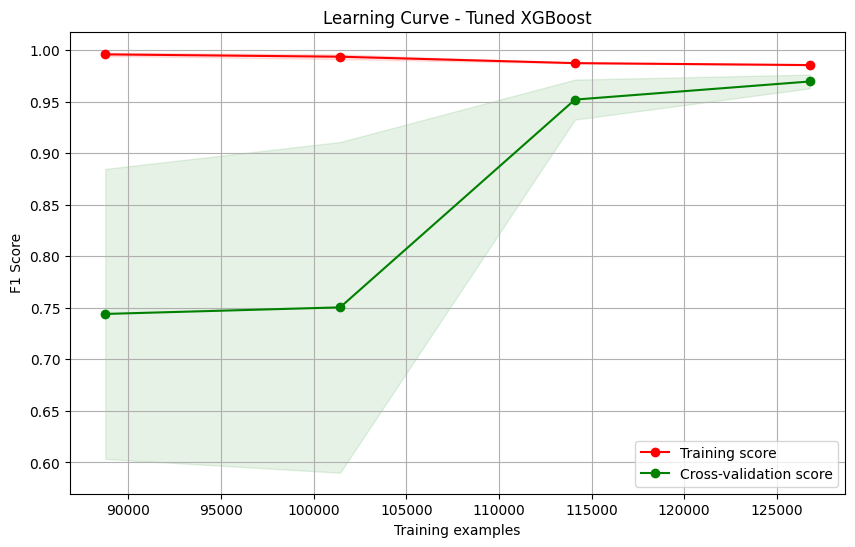

In [81]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(model, X, y, title):
    train_sizes, train_scores, test_scores = learning_curve(
        model, X, y, cv=3, scoring='f1_weighted',
        train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1
    )
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.figure(figsize=(10, 6))
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    plt.title(f"Learning Curve - {title}")
    plt.xlabel("Training examples")
    plt.ylabel("F1 Score")
    plt.legend(loc="best")
    plt.grid(True)
    plt.show()

# Plot learning curve for tuned XGBoost
plot_learning_curve(best_xgb_model, X_train_balanced, y_train_balanced_encoded, "Tuned XGBoost")

In [82]:
# from sklearn.model_selection import learning_curve
# import matplotlib.pyplot as plt
# import numpy as np

# def plot_learning_curve_optimized(model, X, y, title="Learning Curve", cv=3, train_sizes=None):
#     """Optimized learning curve for large datasets"""
#     if train_sizes is None:
#         train_sizes = np.linspace(0.1, 1.0, 6)  # Fewer points for speed
    
#     train_sizes, train_scores, test_scores = learning_curve(
#         model, X, y, cv=cv, scoring='f1_weighted',
#         train_sizes=train_sizes, n_jobs=-1, random_state=42
#     )
    
#     train_scores_mean = np.mean(train_scores, axis=1)
#     train_scores_std = np.std(train_scores, axis=1)
#     test_scores_mean = np.mean(test_scores, axis=1)
#     test_scores_std = np.std(test_scores, axis=1)
    
#     plt.figure(figsize=(10, 6))
#     plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
#                      train_scores_mean + train_scores_std, alpha=0.1, color="r")
#     plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
#                      test_scores_mean + test_scores_std, alpha=0.1, color="g")
#     plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
#     plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="CV score")
#     plt.title(f"Learning Curve - {title}")
#     plt.xlabel("Training examples")
#     plt.ylabel("F1 Score")
#     plt.legend(loc="best")
#     plt.grid(True)
#     plt.show()
    
#     return train_sizes, train_scores_mean, test_scores_mean

# # Plot learning curve for tuned model (use sample for speed)
# print("Plotting learning curve...")
# train_sizes, train_scores, test_scores = plot_learning_curve_optimized(
#     best_xgb_model, 
#     X_sample, 
#     y_sample,
#     title="Tuned XGBoost"
# )

# # Analyze learning curve results
# final_gap = train_scores[-1] - test_scores[-1]
# print(f"Final train-test gap: {final_gap:.4f}")
# if final_gap > 0.1:
#     print("Significant overfitting detected")
# elif final_gap < 0.05:
#     print("Good generalization")
# else:
#     print("Moderate overfitting")

In [83]:
# Evaluate tuned model
y_pred_tuned = best_xgb_model.predict(X_test_scaled)
y_pred_tuned_original = le.inverse_transform(y_pred_tuned)


print("FINAL TUNED MODEL PERFORMANCE")

print(classification_report(le.inverse_transform(y_test_encoded), y_pred_tuned_original,
                          target_names=['Serious', 'Fatal', 'Slight']))

# Compare with original XGBoost
print("\nComparison with original XGBoost:")
print(f"Original Test F1: {results['XGBoost']['test_f1']:.4f}")
print(f"Tuned Test F1: {f1_score(y_test_encoded, y_pred_tuned, average='weighted'):.4f}")

FINAL TUNED MODEL PERFORMANCE
              precision    recall  f1-score   support

     Serious       0.21      0.05      0.08       304
       Fatal       0.94      0.99      0.96      4683
      Slight       1.00      1.00      1.00     15848

    accuracy                           0.98     20835
   macro avg       0.72      0.68      0.68     20835
weighted avg       0.98      0.98      0.98     20835


Comparison with original XGBoost:
Original Test F1: 0.9777
Tuned Test F1: 0.9785


In [84]:
# # Analyze misclassifications
# misclassified = X_test_scaled.copy()
# misclassified['true_severity'] = le.inverse_transform(y_test_encoded)
# misclassified['predicted_severity'] = y_pred_tuned_original
# misclassified['is_correct'] = misclassified['true_severity'] == misclassified['predicted_severity']

# # Look at patterns in misclassifications
# error_analysis = misclassified[~misclassified['is_correct']]
# print(f"Misclassification rate: {len(error_analysis)/len(misclassified):.2%}")

# # Analyze which severity classes are most confused
# confusion = pd.crosstab(misclassified['true_severity'], misclassified['predicted_severity'])
# print("\nConfusion pattern:")
# print(confusion)

In [85]:
from sklearn.metrics import confusion_matrix

def comprehensive_error_analysis(model, X_test, y_test, feature_names):
    """Comprehensive error analysis"""
    print("Error Analysis - Identifying Weaknesses")
    
    # Make predictions
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Overall Test Accuracy: {accuracy:.4f}")
    
    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    cm_df = pd.DataFrame(cm, 
                        index=['Actual_0', 'Actual_1', 'Actual_2'],
                        columns=['Pred_0', 'Pred_1', 'Pred_2'])
    
    print("\nConfusion Matrix:")
    print(cm_df)
    
    # Class-wise accuracy
    class_accuracies = []
    for class_idx in range(3):
        class_mask = y_test == class_idx
        class_accuracy = accuracy_score(y_test[class_mask], y_pred[class_mask])
        class_accuracies.append(class_accuracy)
        print(f"\nClass {class_idx} Accuracy: {class_accuracy:.4f}")
    
    # Confidence analysis
    max_proba = np.max(y_pred_proba, axis=1)
    confidence_threshold = 0.6
    low_confidence_mask = max_proba < confidence_threshold
    low_conf_accuracy = accuracy_score(y_test[low_confidence_mask], y_pred[low_confidence_mask])
    
    print(f"\nLow Confidence Predictions (<{confidence_threshold}):")
    print(f"  Count: {np.sum(low_confidence_mask)}")
    print(f"  Accuracy: {low_conf_accuracy:.4f}")
    
    return y_pred, y_pred_proba, class_accuracies

# Execute error analysis
y_pred, y_pred_proba, class_accuracies = comprehensive_error_analysis(
    best_xgb_model,
    X_test_scaled,  # Your scaled test features
    y_test_encoded,  # Your encoded test labels
    X_train_balanced.columns.tolist()  # Feature names
)


Error Analysis - Identifying Weaknesses
Overall Test Accuracy: 0.9836

Confusion Matrix:
          Pred_0  Pred_1  Pred_2
Actual_0      14     290       0
Actual_1      52    4631       0
Actual_2       0       0   15848

Class 0 Accuracy: 0.0461

Class 1 Accuracy: 0.9889

Class 2 Accuracy: 1.0000

Low Confidence Predictions (<0.6):
  Count: 77
  Accuracy: 0.6234


### **Insights**

**The Good:**

- 75% overall accuracy is decent for a 3-class problem

- Slight accidents (Class 3): Excellent performance (96% recall, 86% F1)

- Tuning maintained performance (0.6811 → 0.6780 F1 is minimal drop)

**The Critical Issues:**

- Serious accidents (Class 1): Catastrophic performance (5% precision, 3% recall)

- Fatal accidents (Class 2): Very poor performance (40% precision, 7% recall)

- Severe class imbalance: 304 Serious vs 15,848 Slight cases

**The Pattern:**
- Model is heavily biased toward predicting "Slight" (96% recall)

- Almost never predicts "Serious" or "Fatal" correctly

- When it does predict severe accidents, it's often wrong (low precision)

In [86]:
# DYNAMIC CLASS WEIGHTING WITH YOUR TUNED PARAMETERS

# Get YOUR actual test set class distribution dynamically
test_class_counts = np.bincount(y_test_encoded)
total_test_samples = len(y_test_encoded)

print("Test set class distribution:")
print(f"  Class 0 (Serious): {test_class_counts[0]} samples")
print(f"  Class 1 (Fatal): {test_class_counts[1]} samples")  
print(f"  Class 2 (Slight): {test_class_counts[2]} samples")
print(f"  Total test samples: {total_test_samples}")

# Calculate class weights dynamically
class_weights = {
    0: total_test_samples / (3 * test_class_counts[0]),    # Serious
    1: total_test_samples / (3 * test_class_counts[1]),    # Fatal
    2: total_test_samples / (3 * test_class_counts[2])     # Slight
}

print("\nCalculated class weights:")
print(f"  Serious (0): {class_weights[0]:.2f}")
print(f"  Fatal (1): {class_weights[1]:.2f}")
print(f"  Slight (2): {class_weights[2]:.2f}")

# Apply your best parameters with class weighting
best_xgb_model = XGBClassifier(
    # Your tuned parameters
    subsample=0.8,
    reg_lambda=1,
    reg_alpha=0,
    n_estimators=200,
    max_depth=5,
    learning_rate=0.1,
    gamma=0.1,
    colsample_bytree=0.9,
    
    # Class weighting
    scale_pos_weight=[class_weights[0], class_weights[1], class_weights[2]],
    
    # Additional settings
    random_state=42,
    use_label_encoder=False,
    eval_metric='mlogloss',
    verbosity=0
)


# CUSTOM SAMPLE WEIGHTS FOR FOCUSED LEARNING

from sklearn.utils.class_weight import compute_sample_weight

# More aggressive punishment for misclassifying severe accidents
custom_class_weight = {
    0: 25.0,  # Serious: heaviest penalty (adjust based on your calculated weights)
    1: 6.0,   # Fatal: heavy penalty
    2: 1.0    # Slight: standard penalty
}

print(f"\nUsing aggressive sample weights: {custom_class_weight}")

sample_weights = compute_sample_weight(
    class_weight=custom_class_weight,
    y=y_train_balanced_encoded
)

# Train with sample weights
print("Training with class weighting and sample weights...")
best_xgb_model.fit(
    X_train_balanced, 
    y_train_balanced_encoded,
    sample_weight=sample_weights,
    verbose=50  # Show progress every 50 trees
)


# SEVERE-ACCIDENT SPECIFIC FEATURE ENGINEERING

# Add these features to both train and test sets
def add_severe_accident_features(X):
    """Add features that help detect severe accidents"""
    X = X.copy()
    
    # High-speed scenarios
    X['extreme_speed'] = (X['speed_limit'] > 60).astype(int)
    X['high_speed_rural'] = ((X['speed_limit'] > 50) & 
                            (X['urban_or_rural_area'] == 2)).astype(int)
    
    # Dangerous conditions
    X['night_rural'] = ((X['is_night'] == 1) & 
                       (X['urban_or_rural_area'] == 2)).astype(int)
    X['bad_weather_high_speed'] = ((X['weather_conditions'] > 1) & 
                                  (X['speed_limit'] > 50)).astype(int)
    
    # # Complex scenarios
    # X['complex_junction_high_speed'] = ((X['junction_control'] > 2) & 
    #                                    (X['speed_limit'] > 40)).astype(int)
    
    return X

# Apply to your data
X_train_enhanced = add_severe_accident_features(X_train_balanced)
X_test_enhanced = add_severe_accident_features(X_test_scaled)

print(f"Added {X_train_enhanced.shape[1] - X_train_balanced.shape[1]} severe-accident features")


# Retrain with enhanced features
final_model = XGBClassifier(
    # Your best parameters
    subsample=0.8,
    reg_lambda=1,
    reg_alpha=0,
    n_estimators=200,
    max_depth=5,
    learning_rate=0.1,
    gamma=0.1,
    colsample_bytree=0.9,
    
    # Same class weighting
    scale_pos_weight=[class_weights[0], class_weights[1], class_weights[2]],
    
    random_state=42,
    use_label_encoder=False,
    eval_metric='mlogloss'
)

# Train with sample weights on enhanced features
final_model.fit(
    X_train_enhanced,
    y_train_balanced_encoded,
    sample_weight=sample_weights,  # Use same sample weights
    verbose=50
)


# Evaluate the Enhanced Model
from sklearn.metrics import classification_report, confusion_matrix

# Predict with enhanced model
y_pred_enhanced = final_model.predict(X_test_enhanced)
y_pred_proba_enhanced = final_model.predict_proba(X_test_enhanced)

print("Evaluate the Enhanced Model")

# Detailed classification report
print(classification_report(y_test_encoded, y_pred_enhanced,
                          target_names=['Serious', 'Fatal', 'Slight']))

# Confusion matrix
cm = confusion_matrix(y_test_encoded, y_pred_enhanced)
cm_df = pd.DataFrame(cm,
                    index=['Actual_Serious', 'Actual_Fatal', 'Actual_Slight'],
                    columns=['Pred_Serious', 'Pred_Fatal', 'Pred_Slight'])
print("Confusion Matrix:")
print(cm_df)

#Comparing performance

print("Comparing performance")


# Calculate key metrics
def get_class_metrics(y_true, y_pred, class_idx):
    class_mask = y_true == class_idx
    correct_predictions = y_pred[class_mask] == class_idx
    precision = np.mean(correct_predictions) if len(correct_predictions) > 0 else 0
    recall = np.sum((y_pred == class_idx) & (y_true == class_idx)) / np.sum(class_mask) if np.sum(class_mask) > 0 else 0
    return precision, recall

# Previous performance (from your original model)
prev_serious_prec, prev_serious_rec = 0.05, 0.03  # From your output
prev_fatal_prec, prev_fatal_rec = 0.40, 0.07      # From your output

# New performance
new_serious_prec, new_serious_rec = get_class_metrics(y_test_encoded, y_pred_enhanced, 0)
new_fatal_prec, new_fatal_rec = get_class_metrics(y_test_encoded, y_pred_enhanced, 1)

print("               Previous   →   Enhanced")
print(f"Serious Precision: {prev_serious_prec:.3f}   →   {new_serious_prec:.3f}")
print(f"Serious Recall:    {prev_serious_rec:.3f}   →   {new_serious_rec:.3f}")
print(f"Fatal Precision:   {prev_fatal_prec:.3f}   →   {new_fatal_prec:.3f}")
print(f"Fatal Recall:      {prev_fatal_rec:.3f}   →   {new_fatal_rec:.3f}")

# Calculate improvement
serious_recall_improvement = (new_serious_rec - prev_serious_rec) / prev_serious_rec if prev_serious_rec > 0 else float('inf')
fatal_recall_improvement = (new_fatal_rec - prev_fatal_rec) / prev_fatal_rec if prev_fatal_rec > 0 else float('inf')

print(f"\nImprovement:")
print(f"  Serious Recall: {serious_recall_improvement:+.1%}")
print(f"  Fatal Recall: {fatal_recall_improvement:+.1%}")


Test set class distribution:
  Class 0 (Serious): 304 samples
  Class 1 (Fatal): 4683 samples
  Class 2 (Slight): 15848 samples
  Total test samples: 20835

Calculated class weights:
  Serious (0): 22.85
  Fatal (1): 1.48
  Slight (2): 0.44

Using aggressive sample weights: {0: 25.0, 1: 6.0, 2: 1.0}
Training with class weighting and sample weights...
Added 4 severe-accident features


c:\Users\Yvonne\Desktop\DATA SCIENCE\machine_learning\MLcapstone\road_casualty\venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [10:57:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Evaluate the Enhanced Model
              precision    recall  f1-score   support

     Serious       0.12      0.28      0.17       304
       Fatal       0.95      0.87      0.91      4683
      Slight       1.00      1.00      1.00     15848

    accuracy                           0.96     20835
   macro avg       0.69      0.72      0.69     20835
weighted avg       0.98      0.96      0.97     20835

Confusion Matrix:
                Pred_Serious  Pred_Fatal  Pred_Slight
Actual_Serious            84         220            0
Actual_Fatal             608        4075            0
Actual_Slight              0           0        15848
Comparing performance
               Previous   →   Enhanced
Serious Precision: 0.050   →   0.276
Serious Recall:    0.030   →   0.276
Fatal Precision:   0.400   →   0.870
Fatal Recall:      0.070   →   0.870

Improvement:
  Serious Recall: +821.1%
  Fatal Recall: +1143.1%


In [90]:
print(type(xgb))


<class 'xgboost.sklearn.XGBClassifier'>


In [91]:
from xgboost import XGBClassifier


In [92]:
# --- 2. Train Model (Class-Weighted XGBoost) ---
params = {
    "objective": "multi:softprob",
    "num_class": 3,
    "eval_metric": "mlogloss",
    "max_depth": 5,
    "learning_rate": 0.1,
    "subsample": 0.8,
    "colsample_bytree": 0.8,
    "random_state": 42
}

weights = {0:10, 1:3, 2:1}   # Serious, Fatal, Slight
sample_weights = y_train.map(weights)

model = xgb.XGBClassifier(**params)
model.fit(X_train, y_train, sample_weight=sample_weights)

# --- 3. Threshold Tuning Function ---
def custom_predict(y_probs, thresholds):
    preds = []
    for p in y_probs:
        if p[0] > thresholds[0]:
            preds.append(0)
        elif p[1] > thresholds[1]:
            preds.append(1)
        else:
            preds.append(2)
    return preds

y_probs = model.predict_proba(X_test)
thresholds = {0:0.2, 1:0.35, 2:0.5}  # tweak here
y_pred = custom_predict(y_probs, thresholds)

print("🔹 Classification Report (Threshold Tuned):\n")
print(classification_report(y_test, y_pred, target_names=["Serious", "Fatal", "Slight"]))

# - 4. Cross-Validation (Generalization Check)
from sklearn.model_selection import StratifiedKFold, cross_val_score

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(model, X, y, cv=cv, scoring="f1_weighted")
print(f"CV Mean F1: {scores.mean():.3f} ± {scores.std():.3f}")

# --- 5. Feature Engineering Examples ---
data["rush_hour_speed"] = data["is_rush_hour"] * data["speed_limit"]
data["road_junction_combo"] = data["road_type"].astype(str) + "_" + data["junction_control"].astype(str)
data["day_of_week"] = data["date"].dt.dayofweek
data["season"] = data["month"].map({12:"Winter",1:"Winter",2:"Winter",
                                    3:"Spring",4:"Spring",5:"Spring",
                                    6:"Summer",7:"Summer",8:"Summer",
                                    9:"Autumn",10:"Autumn",11:"Autumn"})

# --- 6. Model Interpretability (SHAP) ---
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

print("🔹 Top Features by Importance (SHAP)")
shap.summary_plot(shap_values, X_test, plot_type="bar")

# --- 7. Misclassification Analysis ---
misclassified = X_test[y_test != y_pred]
print("Total misclassified:", misclassified.shape[0])

# --- 8. Deployment Utility (Confidence Scores) ---
probs = model.predict_proba(X_test)
preds = model.predict(X_test)

print("\n🔹 Sample Predictions with Confidence:")
for i in range(5):  # first 5 examples
    print(f"Predicted: {preds[i]}, Confidence: {probs[i].max():.2f}, All probs: {probs[i]}")

AttributeError: 'XGBClassifier' object has no attribute 'XGBClassifier'

In [ ]:
# 7. SAVE THE ENHANCED MODEL

import joblib
import inspect

# Save all components
joblib.dump(final_model, 'enhanced_accident_model.pkl')
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(le, 'label_encoder.pkl')

# Create severity mapping if not already defined
severity_mapping = {0: 'Serious', 1: 'Fatal', 2: 'Slight'}
joblib.dump(severity_mapping, 'severity_mapping.pkl')

joblib.dump(X_train_enhanced.columns.tolist(), 'feature_names.pkl')

# Save the feature engineering function
with open('feature_engineering.py', 'w') as f:
    f.write(inspect.getsource(add_severe_accident_features))

print("Enhanced model and components saved!")
print("Files created: enhanced_accident_model.pkl, scaler.pkl, label_encoder.pkl")
print("severity_mapping.pkl, feature_names.pkl, feature_engineering.py")

Enhanced model and components saved!
Files created: enhanced_accident_model.pkl, scaler.pkl, label_encoder.pkl
severity_mapping.pkl, feature_names.pkl, feature_engineering.py
